#CHAPTER 1: DEFINITIONS OF THE PROBLEM STATEMENT AND ANALYSING BASIC METRICS ON DATA

##**Introduction to Aerofit**

HISTORY:

> Walmart Inc is an `American multinational retail corporation` that operates a chain of `hypermarkets, discount department stores and grocery stores` in the United States. Headquarter is in `Bentonville, Arkansas.`. The company was founded by `Sam Walton and James Bud Walton` in 1962. 

> By 2022, Walmart has `10586 stores and clubs in 24 countries`, operating under `46 different names`. For eg: In India, It is named as `Flipkart Wholesale`.

> Walmart is the `world's largest company by revenue`, with about `US\$570 billion in annual revenue`, according to `Fortune Global 500 list` of 2022. It has more than `100 million customers` worldwide.

##**Problem Definition**

> The Management team at Walmart Inc. wants to analyze the `customer purchase behavior` (specifically, `purchase amount`) against the `customer’s gender` and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: `Do women spend more on Black Friday than men?` (`Assume 50 million customers are male and 50 million are female`).

##**Dataset**

> The company collected the `transactional data of customers` who purchased products from the Walmart Stores `during Black Friday`.

###Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli,binom,norm,expon,geom,poisson,lognorm
import math
import io

###Importing the dataset `Walmart_data.csv`

In [2]:
# from google.colab import files
# uploaded = files.upload()
# print("Done")

In [3]:
# walmart = pd.read_csv(io.BytesIO(uploaded['walmart_data.csv']))
walmart = pd.read_csv("walmart_data.csv")

In [4]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


###Details regarding each column in dataset

|Details|Regarding Information|
|--------|-----------------------|
|User_ID: |User ID|
|Product_ID: |Product ID|
|Gender: |Sex of User|
|Age: |Age in bins|
|Occupation: |Occupation(Masked)|
|City_Category: |Category of the City (A,B,C)|
|StayInCurrentCityYears: |Number of years stay in current city|
|Marital_Status: |Marital Status|
|ProductCategory: |Product Category (Masked)|
|Purchase: |Purchase Amount|

##**Analysing Basic Metrics**

###Number of rows, columns, datatypes

In [5]:
#Number of rows and columns
print("Number of rows: {},\nNumber of columns: {}".format(walmart.shape[0],walmart.shape[1]))

Number of rows: 550068,
Number of columns: 10


In [6]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


> `Occupation, Marital Status and Product Category` can be changed from `int64 datatype to object datatype` as they are categorical attributes

In [7]:
#Convert the Occupation, Marital Status and Product Category columns data type to 'object'
Columns_to_convert_as_object = ["Occupation","Marital_Status","Product_Category"]
walmart[Columns_to_convert_as_object] = walmart[Columns_to_convert_as_object].astype("object")

In [8]:
#Checking datatypes
walmart.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

> Except User_ID and Purchase columns, remaining all columns are `object` data type. 

###nunique and unique

In [9]:
#number of unique values in each column of given dataset
for i in walmart.columns:
    print(i,":",walmart[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


> How many users are there in the given dataset? <br>
Ans: `5891 unique users`

> How many products are there in the given dataset?<br>
Ans: `3631 unique products`

> Number of User_ID's are less than Number of actual rows of dataset. So it cannot taken as primary key.

In [10]:
#unique values for "Gender","Age","Occupation","City_category",
#"Stay_In_Current_City_Years","Marital_Status","Product_Category" columns
for i in walmart.columns:
    if i in ["User_ID","Product_ID","Purchase"]:
        continue
    print(i,sorted(walmart[i].unique()),"",sep = "\n")

Gender
['F', 'M']

Age
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

Occupation
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

City_Category
['A', 'B', 'C']

Stay_In_Current_City_Years
['0', '1', '2', '3', '4+']

Marital_Status
[0, 1]

Product_Category
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]



Observations:

> How many occupations are there in the given dataset?<br>
Ans: 21 unique occupations(masked)(range 0 to 20)

> How many product categories are there in the given dataset?<br>
Ans: 20 unique product categories (range 1 to 20)

> Age column consists of 7 unique values in BINS.

> 'City Category' = A,B,C, Marital_Status = `{"0": "Not Married","1":"Married"}`

> range of 'Stay_In_current_city_years' = 0 to 3 and 4+

###Range of One transaction Purchase amount

In [11]:
#Minimum and Maximum value for Numerical Column --> "Purchase"
print("Maximum Purchase Value of a customer for one product/one transaction is $",walmart["Purchase"].max(),sep = "")
print("Minimum Purchase Value of a customer for one product/one transaction is $",walmart["Purchase"].min(),sep = "")

Maximum Purchase Value of a customer for one product/one transaction is $23961
Minimum Purchase Value of a customer for one product/one transaction is $12


> range of Purchase Value of a customer for one product/one transaction is \$12 to \$23961

In [12]:
#memory used by each column
walmart.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category              4400544
Purchase                      4400544
dtype: int64

> all columns are using same amount of memory

#CHAPTER 2: NULL VALUES AND OUTLIERS DETECTION OF DATA

##**Finding Null Values**

In [13]:
#checking null values
walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Observations:

> Interestingly, There are `no null values` in any of the column. So no need to handle the null values. (Imputation of null values is not required)

##**Descriptive Statistics of Dataset**

In [14]:
walmart.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


Observations:

MODE (High frequency values of dataset)

> `Product_ID P00265242` : 1880 times

> `Gender Male` : 414259 times

> `Age group of 26-35` : 219587 times

> `Occupation 4` : 72308 times

> `City Category B` : 231173 times

> `Stay in current city years 1` : 193821 times

> `Marital Status (Not Married)` : 324731 times

> `Product Category 5` : 150933 times 

Descriptive Statistics of Purchase Column:

> `mean` of Purchase value by a customer of one product = `$9263.96`

> `50 percentile` or Median of Purchase value by a customer of one product = `$8047`

> `Standard Deviation` of Purchase value by a customer of one product = `$5023.06`. This indicates that data has more dispersion.

> `25 percentile "Q1"` of Purchase value by a customer of one product = `$5823`

> `75 percentile "Q3"` of Purchase value by a customer of one product = `$12054`

> The difference between Mean and Median Purchase values are significant. So it indicates presence of outliers for that column.  

##**Outlier detection of Purchase column**

###Box plot on each transaction purchase amount and finding IQR Statistically

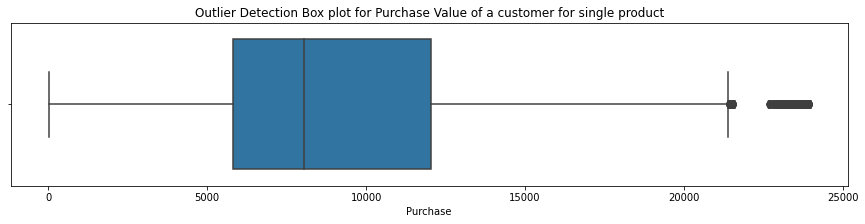

In [15]:
#Box plot for Purchase column
fig = plt.figure(figsize = (15,3))
plt.title("Outlier Detection Box plot for Purchase Value of a customer for single product")
sns.boxplot(data=walmart, x = walmart["Purchase"],orient="h")
plt.show()

In [16]:
#create a function to find outliers using IQR (Statistical way)
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper_whisker = q3+1.5*IQR
    lower_whisker = q1-1.5*IQR
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers,IQR,upper_whisker,lower_whisker

outliers,IQR,uw,lw = find_outliers_IQR(walmart["Purchase"])
print("Outliers of Purchase Value of a customer for single product")
print("number of outliers =", (len(outliers)))
print("max outlier value =", (outliers.max()))
print("min outlier value =", (outliers.min()))
print("Inter Quartile range =",IQR)
print("upper_whisker =", uw)
print("lower whisker =", lw)

Outliers of Purchase Value of a customer for single product
number of outliers = 2677
max outlier value = 23961
min outlier value = 21401
Inter Quartile range = 6231.0
upper_whisker = 21400.5
lower whisker = -3523.5


Observations:

> Difference between Max Oultier Value and Min Outlier Values is \$2560, which is large value. and Number of ouliers are fairly large value 2677. So bounding/deleting of outliers is not good. `Use the dataset without bounding the outliers`

> lower whisker is negative value so It is equal to `zero`

#CHAPTER 3: EXPLORATORY DATA ANALYSIS (Non Graphical and Visual Analysis)

##**Non Graphical analysis**

###Number of Transactions with respect each category of every column

In [17]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 
                    'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for i in categorical_cols:
    print("Number of Transactions in {} column".format(i),end="\n\n")
    print(walmart[i].value_counts(),end="\n\n")

Number of Transactions in Gender column

M    414259
F    135809
Name: Gender, dtype: int64

Number of Transactions in Age column

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Number of Transactions in Occupation column

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

Number of Transactions in City_Category column

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Number of Transactions in Stay_In_Current_City_Years column

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

Number of Transactions in Marital_Status column

0    324731
1    225337
Name: Marital_Status, dtype: int64

N

Observations: According to number of transactions

> `Male : Female` = 414259:135809 = approx `75%:25%`

> More number of transactions by `26-35 Age` group (40% transactions)

> Top five occupations are `4,0,7,1,17`

> City Category `B` = 231173 (`42%`)

> Most transactions from customers who are staying from `1 year`

> Unmarried:Married = 324731:225337 = `60:40`

> Top five product categories are `5,1,8,11,2`

###Average and total Purchase amount of all columns with respect to each of their category

In [18]:
for i in categorical_cols:
    print("Average Purchase amount for {} categories is: ".format(i),walmart.groupby(i)["Purchase"].mean().sort_values(ascending = False),sep = "\n",end="\n\n")
    print("Total Purchase amount for {} categories is: ".format(i),walmart.groupby(i)["Purchase"].sum().sort_values(ascending = False),sep = "\n",end="\n\n")

Average Purchase amount for Gender categories is: 
Gender
M    9437.526040
F    8734.565765
Name: Purchase, dtype: float64

Total Purchase amount for Gender categories is: 
Gender
M    3909580100
F    1186232642
Name: Purchase, dtype: int64

Average Purchase amount for Age categories is: 
Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64

Total Purchase amount for Age categories is: 
Age
26-35    2031770578
36-45    1026569884
18-25     913848675
46-50     420843403
51-55     367099644
55+       200767375
0-17      134913183
Name: Purchase, dtype: int64

Average Purchase amount for Occupation categories is: 
Occupation
17    9821.478236
12    9796.640239
15    9778.891163
8     9532.592497
14    9500.702772
7     9425.728223
16    9394.464349
5     9333.149298
13    9306.351061
6     9256.535691
4     9213.980251
11    9213.845848
3     9178.593088
18    9

Observations

> Average Purchase amount in Age column is highest for 51-55 bin<br>
Total Purchase amount in Age column is highest for 26-35 bin

>Average Purchase amount in Occupation column is highest for 17 bin<br>
Total Purchase amount in Occupation column is highest for 4 bin

>Average Purchase amount in City_category column is highest for C bin<br>
Total Purchase amount in City_category column is highest for B bin

>Average Purchase amount in Stay_in_city column is highest for 2 year bin<br>
Total Purchase amount in Stay_in_city column is highest for 1 year bin

>Average Purchase amount in Product_category column is highest for 10 bin<br>
Total Purchase amount in Product_category column is highest for 1 year bin

> These type of differences because, `Number of smaller amount transactions in a bin is dominating the mean purchase amount of other bin.`

> Above Value counts are based on given dataset. `Given dataset consists of same customer buying multiple products`. So Primary key for above dataset is "User_ID + Product_ID"

###Value_counts by percentage format

> It is better to analyse based number of customers (other than number of transactions bought)

In [19]:
#melt the Categorical columns of walmart data and then group by (attribute and bins), Then get the Count Percentage of each bin
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
(walmart[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(walmart))*100

value
variable                   value           
Age                        0-17    2.745479
                           18-25  18.117760
                           26-35  39.919974
                           36-45  19.999891
                           46-50   8.308246
                           51-55   6.999316
                           55+     3.909335
City_Category              A      26.854862
                           B      42.026259
                           C      31.118880
Gender                     F      24.689493
                           M      75.310507
Marital_Status             0      59.034701
                           1      40.965299
Occupation                 0      12.659889
                           1       8.621843
                           2       4.833584
                           3       3.208694
                           4      13.145284
                           5       2.213726
                           6       3.700452
                           7      10.750125
                           8       0.281056
                           9       1.143677
                           10      2.350618
                           11      2.106285
                           12      5.668208
                           13      1.404917
                           14      4.964659
                           15      2.211545
                           16      4.612339
                           17      7.279645
                           18      1.203851
                           19      1.538173
                           20      6.101427
Product_Category           1      25.520118
                           2       4.338373
                           3       3.674637
                           4       2.136645
                           5      27.438971
                           6       3.720631
                           7       0.676462
                           8      20.711076
                           9       0.074536
                           10      0.931703
                           11      4.415272
                           12      0.717548
                           13      1.008784
                           14      0.276875
                           15      1.143495
                           16      1.786688
                           17      0.105078
                           18      0.568112
                           19      0.291419
                           20      0.463579
Stay_In_Current_City_Years 0      13.525237
                           1      35.235825
                           2      18.513711
                           3      17.322404
                           4+     15.402823

Observations from categorically grouped data:

> approximately `78% of users` are having age between `18 to 45`

> City Category Users ratio approx = `27:42:31`

> Male:Female = `75:25`

> NotMarried:Married = `60:40`

> `35% customers staying from 1 year`. remaining all years customers are almost around 13 to 18 %(similar)

> 

###CrossTab analysis

Cross tab between City Category and Age

In [20]:
pd.crosstab(index = walmart["City_Category"],columns = walmart["Age"],margins = True, normalize="index")*100

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,1.722177,18.639995,49.922150,18.018549,5.149607,4.128757,2.418765
B,2.351053,18.707635,39.617083,20.589775,8.827155,7.674339,2.232960
C,4.161238,16.870454,31.697386,20.913101,10.333285,8.564919,7.459617
All,2.745479,18.117760,39.919974,19.999891,8.308246,6.999316,3.909335


Observations:

> Large percentage of number of transactions are observed in 26-35 age group in all city categories

> 0-17 and 55+ has very less percentage share in all city categories.

In [21]:
pd.crosstab(index = walmart["City_Category"],columns = walmart["Age"],margins = True, normalize="columns")*100

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
City_Category,,,,,,,,
A,16.845451,27.628938,33.583500,24.194413,16.645150,15.841147,16.615513,26.854862
B,35.988611,43.394541,41.707387,43.265796,44.651102,46.079323,24.004836,42.026259
C,47.165938,28.976520,24.709113,32.539791,38.703748,38.079530,59.379650,31.118880


Comparison between Gender and Total Purchase amount

In [22]:
df = pd.DataFrame(walmart.groupby(["Gender"])[["Purchase"]].sum())
df["percentage"] = df["Purchase"]/df["Purchase"].sum()*100
df

,Purchase,percentage
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


Observations:

> Male spent more purchase amount than Female (76:24)

Comparison between Age group and Total Purchase amount

In [23]:
df = pd.DataFrame(walmart.groupby(["Age"])[["Purchase"]].sum())
df["percentage"] = df["Purchase"]/df["Purchase"].sum()*100
df

,Purchase,percentage
Age,,
0-17,134913183,2.647530
18-25,913848675,17.933325
26-35,2031770578,39.871374
36-45,1026569884,20.145361
46-50,420843403,8.258612
51-55,367099644,7.203947
55+,200767375,3.939850


Observations:

> with respect to total purchase amount also, Age group 26-35 dominates other groups.

Comparison between marital status and total purchase amount

In [24]:
df = pd.DataFrame(walmart.groupby(["Marital_Status"])[["Purchase"]].sum())
df["percentage"] = df["Purchase"]/df["Purchase"].sum()*100
df

,Purchase,percentage
Marital_Status,,
0,3008927447,59.047057
1,2086885295,40.952943


Observations:

> With respect to total purchase amount, Unmarried : Married = 59:41

Comparison between City Category and Total Purchase amount

In [25]:
df = pd.DataFrame(walmart.groupby(["City_Category"])[["Purchase"]].sum())
df["percentage"] = df["Purchase"]/df["Purchase"].sum()*100
df

,Purchase,percentage
City_Category,,
A,1316471661,25.834381
B,2115533605,41.515136
C,1663807476,32.650483


Observations:

> A: B: C = 25.8 : 41.5 : 32.7

Comparison between Occupation and Total Purchase amount

In [26]:
df = pd.DataFrame(walmart.groupby(["Occupation"])[["Purchase"]].sum())
df["percentage"] = df["Purchase"]/df["Purchase"].sum()*100
df.sort_values("percentage",ascending = False)

,Purchase,percentage
Occupation,,
4,666244484,13.074352
0,635406958,12.469198
7,557371587,10.937835
1,424614144,8.332609
17,393281453,7.717738
12,305449446,5.994126
20,296570442,5.819885
14,259454692,5.091527
16,238346955,4.677310


Observations:

> Occupation like 4,0, 7 has contributed more towards the total purchase amount

Comparison between Product_Category and Total Purchase amount

In [27]:
df = pd.DataFrame(walmart.groupby(["Product_Category"])[["Purchase"]].sum())
df["percentage"] = df["Purchase"]/df["Purchase"].sum()*100
df.sort_values("percentage",ascending = False)

,Purchase,percentage
Product_Category,,
1,1910013754,37.482024
5,941835229,18.482532
8,854318799,16.765114
6,324150302,6.361111
2,268516186,5.269350
3,204084713,4.004949
16,145120612,2.847840
11,113791115,2.233032
10,100837301,1.978827


Observations:

> Product Categories like 1,5,8 has contributed more towards the total purchase amount

Comparison between Stay_In_Current_City_Years and Total Purchase amount

In [28]:
df = pd.DataFrame(walmart.groupby(["Stay_In_Current_City_Years"])[["Purchase"]].sum())
df["percentage"] = df["Purchase"]/df["Purchase"].sum()*100
df.sort_values("percentage",ascending = False)

,Purchase,percentage
Stay_In_Current_City_Years,,
1,1792872533,35.183250
2,949173931,18.626547
3,884902659,17.365290
4+,785884390,15.422160
0,682979229,13.402754


###User concentrated analysis

In [29]:
walmart.groupby(["User_ID"])["Purchase"].count().sort_values(ascending = False)

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002111       7
1005391       7
1002690       7
1005608       7
1000708       6
Name: Purchase, Length: 5891, dtype: int64

Observations:

>1001680 has done more number of transactions

In [30]:
walmart.groupby(["User_ID"])["Purchase"].sum().sort_values(ascending = False)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
             ...   
1004991       52371
1005117       49668
1003883       49349
1000094       49288
1004464       46681
Name: Purchase, Length: 5891, dtype: int64

Observations:

> 1004277 has made highest total purchase amount

In [31]:
walmart.groupby(["User_ID"])["Purchase"].mean().sort_values(ascending = False)

User_ID
1003902    18577.893617
1005069    18490.166667
1005999    18345.944444
1001349    18162.739130
1003461    17508.700000
               ...     
1004636     3612.812500
1005944     3599.733333
1002744     3421.521739
1003598     2698.357143
1004486     2318.733333
Name: Purchase, Length: 5891, dtype: float64

Observations:

> On average, 1003902 User spent more purchase amount.

##**Visual Analysis**

###Reset the index of above melted walmart data

In [32]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
Attribute_melt_group= (walmart[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(walmart))*100

In [33]:
Attribute_melt_group.columns = ["Percentages"]
Attribute_melt_group = Attribute_melt_group.reset_index()
Attribute_melt_group.columns = ["Attribute","Bins","Percentages"]
Attribute_melt_group

,Attribute,Bins,Percentages
0,Age,0-17,2.745479
1,Age,18-25,18.117760
2,Age,26-35,39.919974
3,Age,36-45,19.999891
4,Age,46-50,8.308246
5,Age,51-55,6.999316
6,Age,55+,3.909335
7,City_Category,A,26.854862
8,City_Category,B,42.026259
9,City_Category,C,31.118880


###Bivariate Analysis between Bins of each column and respective Number of transactions in percentages

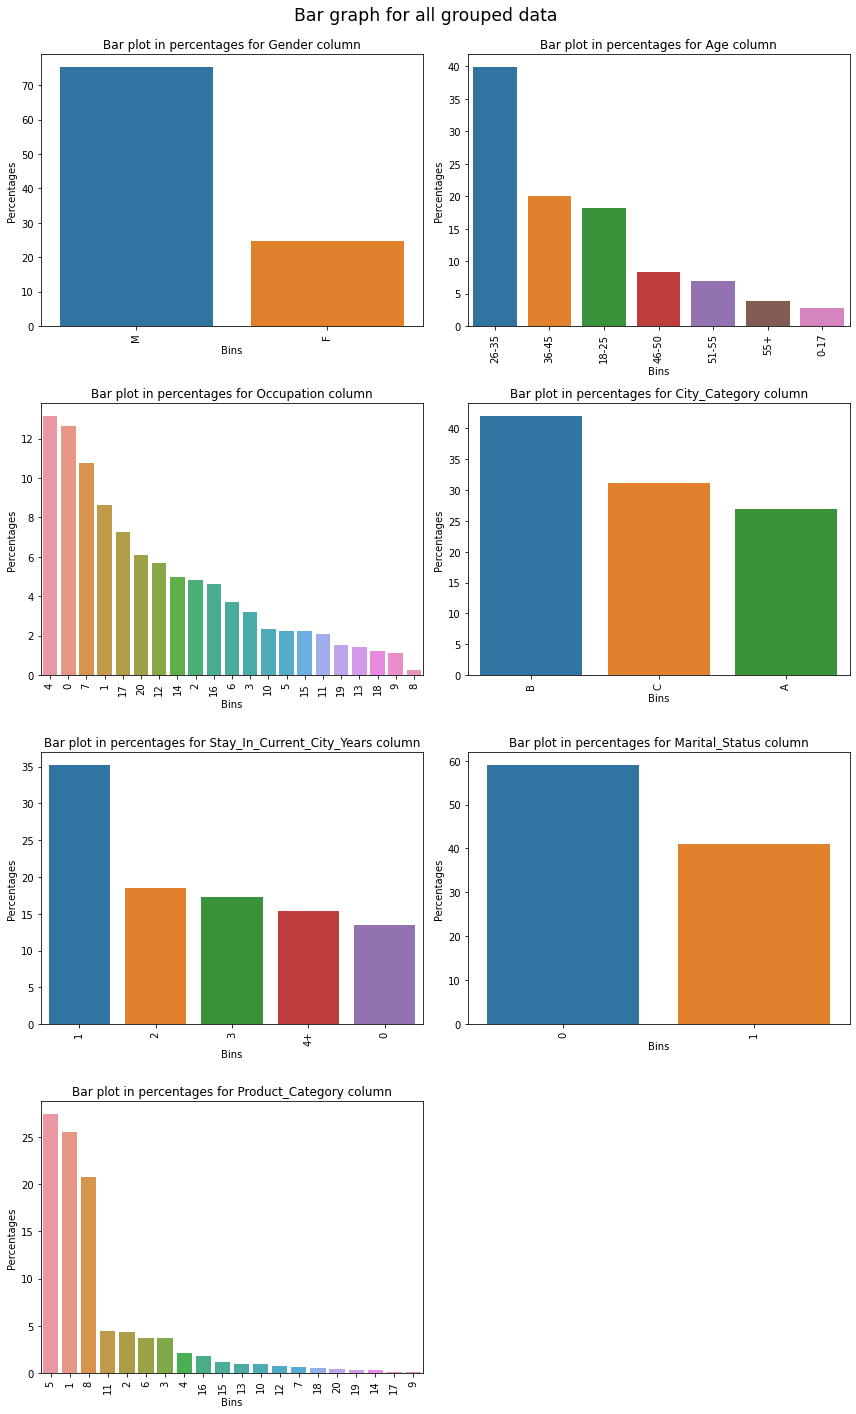

In [34]:
# Bar graph for all grouped data
fig = plt.figure(figsize = (12,20))
fig.suptitle("Bar graph for all grouped data \n",fontsize = "xx-large" )
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 
                    'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
k = 1
for i in categorical_cols:
    plt.subplot(4,2,k)
    plt.title("Bar plot in percentages for {} column".format(i))
    mask = Attribute_melt_group[Attribute_melt_group["Attribute"] ==i]
    sns.barplot(data=mask, x = mask["Bins"],y = mask["Percentages"],
                order = mask.sort_values("Percentages",ascending = False).Bins)
    plt.xticks(rotation = 90)
    k = k+1
plt.tight_layout()
plt.show()

Observations:

> Product Category - 1,5,8 have high purchasing frequencies

> Occupation Category - 4, 0 ,7, 1, 17, 20 occupy approxmately 50% of dataset

###Univariate analysis on Purchase column bins with step size = \$2500

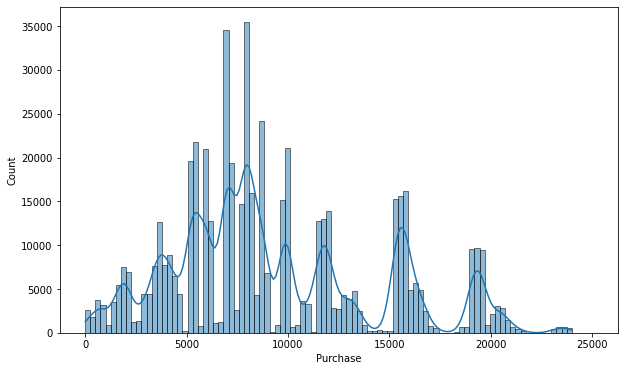

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=walmart, x='Purchase', kde=True,bins = np.linspace(0,25000,100))
plt.show()

Observations

> \$5000 to \$10000 bin consists of more transactions

> The Kde distribution of purchase column is like `multi modal distribution`i.e., more than one maxima locally

###Pie plots on Age and Stay in city columns

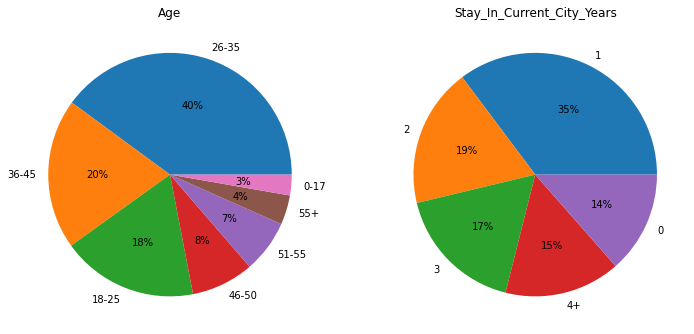

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
data = walmart['Age'].value_counts(normalize=True)*100
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%')
axs[0].set_title("Age")
data = walmart['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%')
axs[1].set_title("Stay_In_Current_City_Years")
plt.show()

###Bivariate analysis between Purchase amount and Number of customers grouped by Gender

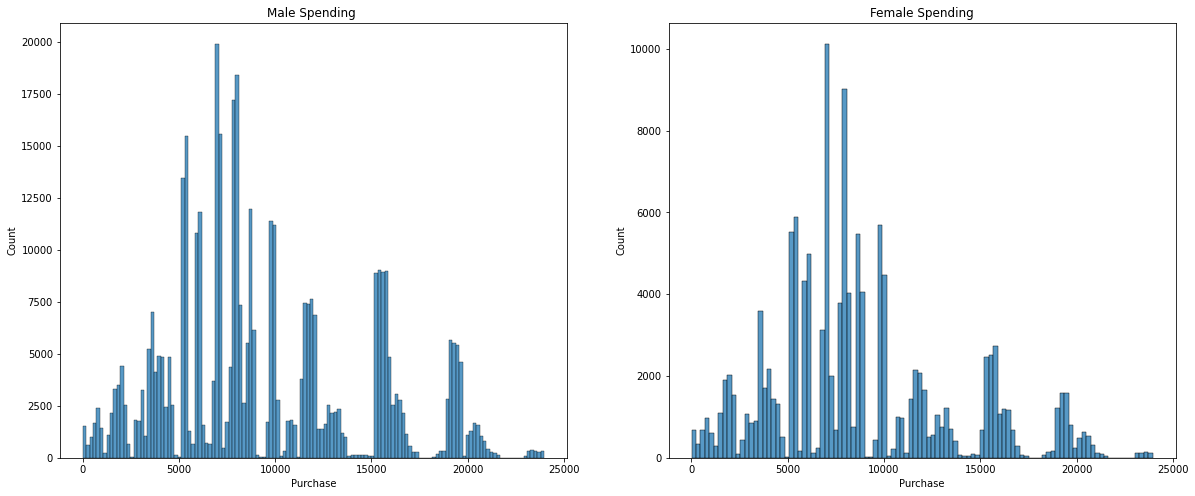

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.histplot(data=walmart[walmart['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male Spending ")
sns.histplot(data=walmart[walmart['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female Spending")
plt.show()

###Bivariate analysis using box plot on all categorical columns

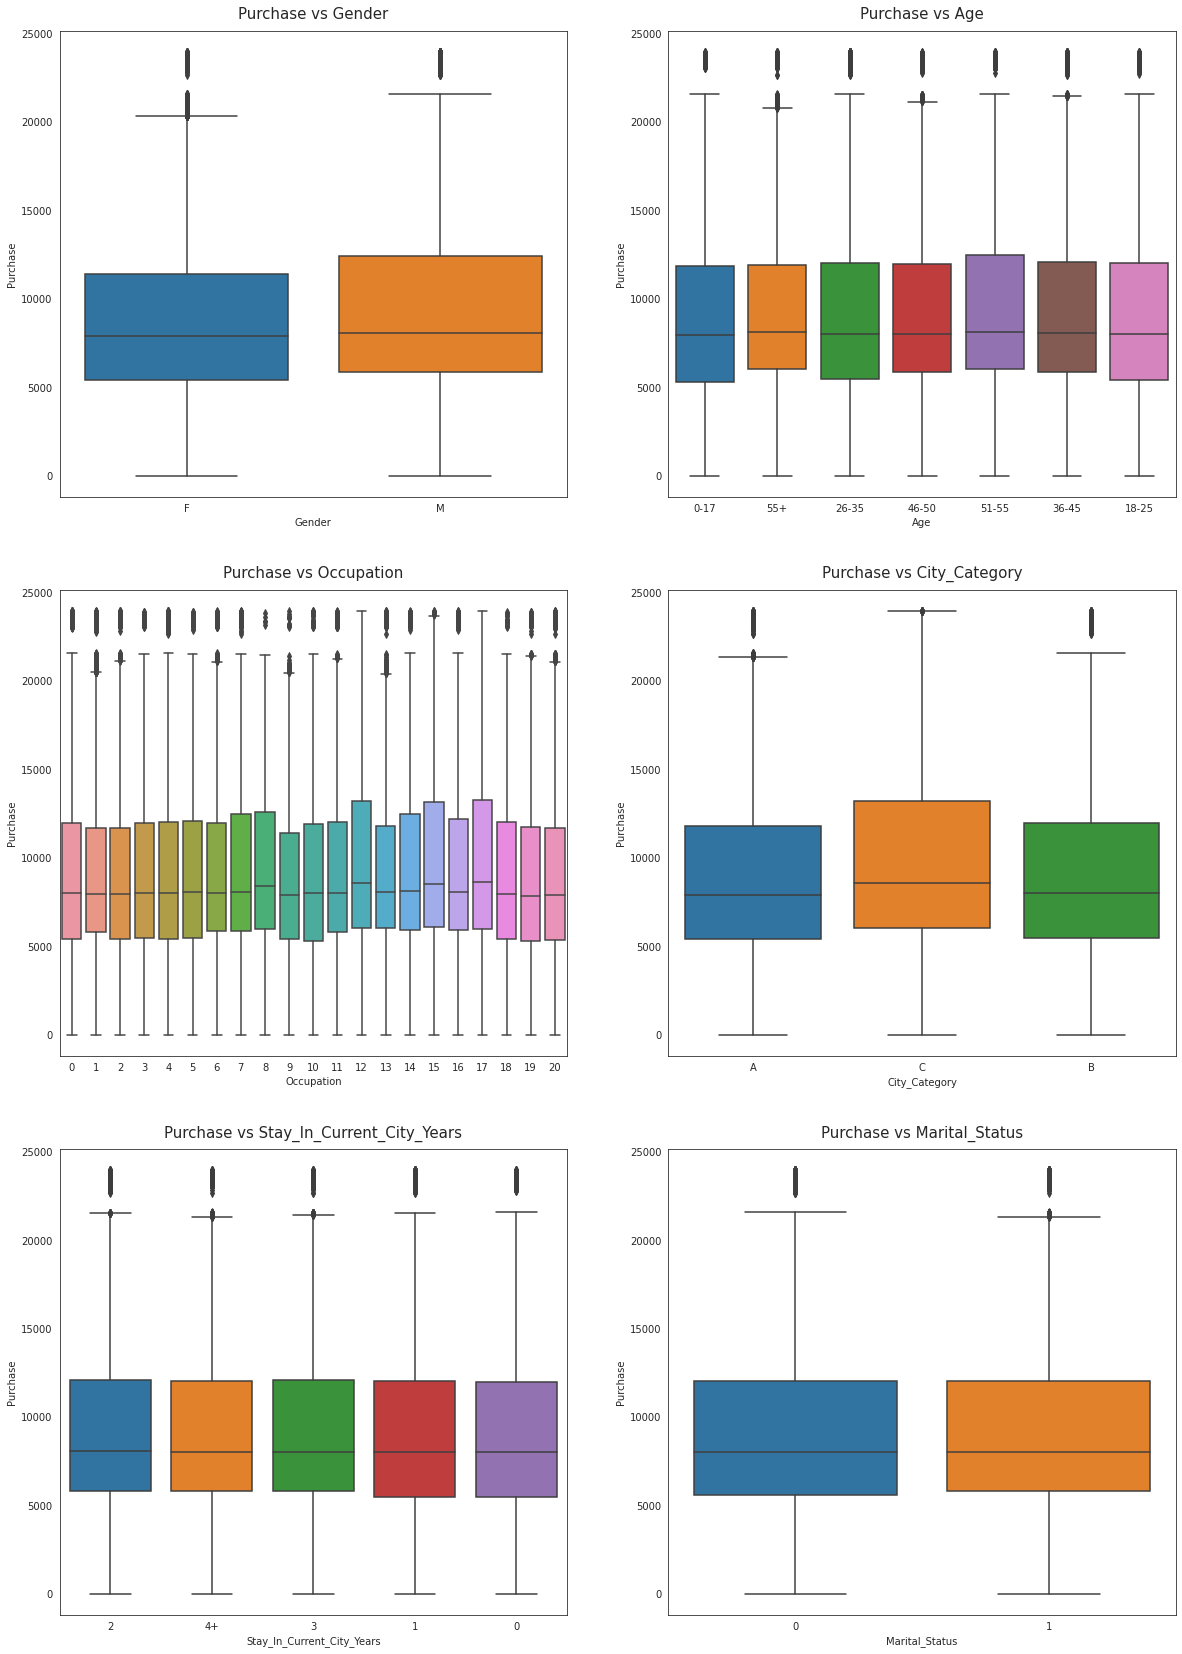

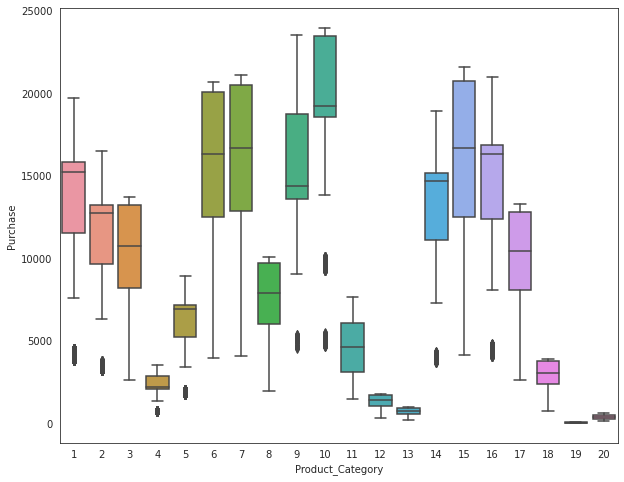

In [38]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.5)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=walmart, y='Purchase', x=attrs[count], ax=axs[row, col])
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=15)
        count += 1
plt.show()
plt.figure(figsize=(10, 8))
sns.boxplot(data=walmart, y='Purchase', x=attrs[-1])
plt.show()

Observations

> Outliers are present in all graphs. Outliers are on upper side for graps except Product category vs Purchase

> Median values are approximately similar in all graphs except Product category vs Purchase. 

> Median of 10 Product Category is highest and 19 is lowest.

> It indicates that product category 10 is the costliest category and Product 19 is cheapest category

###Multi variate analysis using box plot by taking Gender column as common vs Purchase. Legends are varied among remaining categorical columns

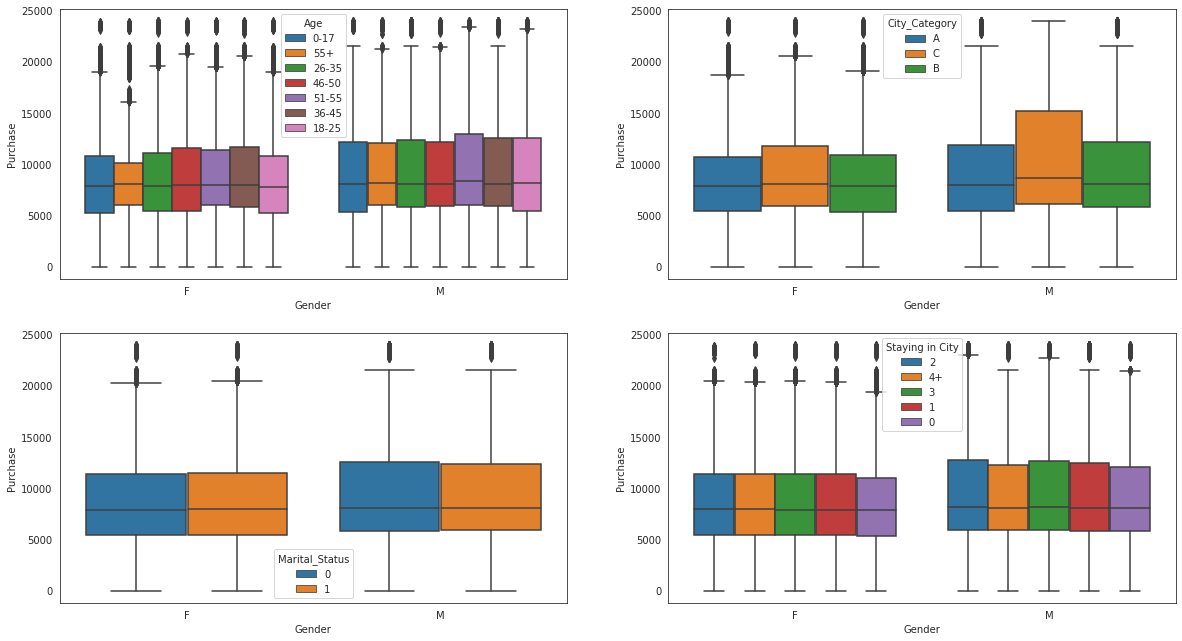

In [39]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])
axs[1,1].legend(loc='best',title="Staying in City")
plt.show()

Observations:

> For Male and Female, With respect to Age Bins, Median Purchase values are almost similar. 

> For Male and Female, With respect to Marital Status, Median Purchase values are almost similar.

> For Male and Female, With respect to City Category, slightly Category B Median Purchase value is higher for both female and male

> For Male and Female, With respect to Stay in city column, Median Purchase values are almost similar

###Correlation heat maps and pair plots

<Axes: >

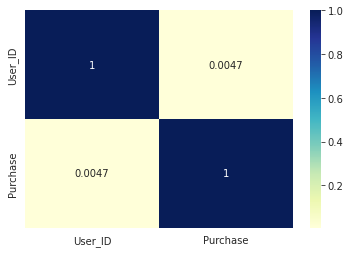

In [40]:
sns.heatmap(walmart.corr(), cmap="YlGnBu", annot=True)

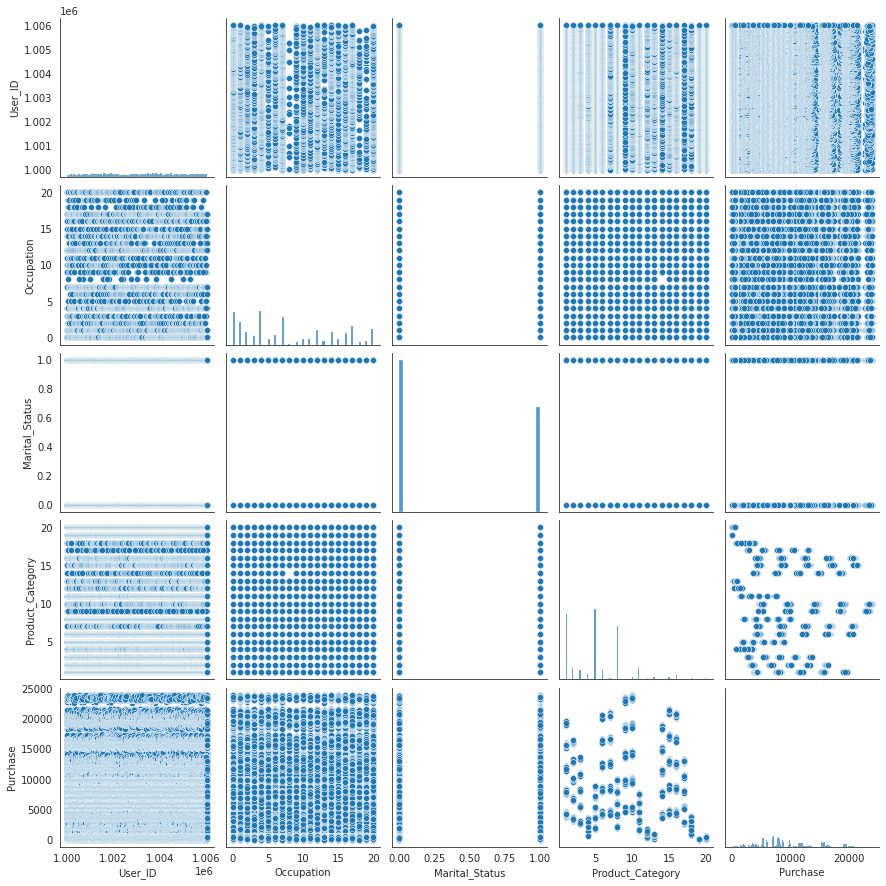

In [41]:
sns.pairplot(walmart)

#CHAPTER 4: APPLICATION OF CENTRAL LIMIT THEOREM AND OBTAINING CONFIDENCE INTERVALS OF THE DATA

##**Applying CLT for Gender Vs Purchase and finding the distribution and mean**

**Important Note for Boot Strapping the data to 50 Million Female Customers and 50 Million Male customers:**

> Given 550068 transactions data regarding `5891 unique` customers. Among them `4225 Male and 1666 female customers`. Same customers have bought multiple products. Each buy is treated as a transaction.

>So walmart data should be fancy masked by Gender and separate Male and Female Transactions. So that we can take sample from 550068 transactions and bootstrap it. (Not from 5891 unique customers average data)

> Population data should be multiplied by `Random OverSampling by replacement and bootstrapping techniques` and Use this data, To estimate the answers for `50 Million Female` (from 1666) and `50 Million Male`(from 4225) customers

> The distribution followed by samples point estimates are similar to the distribution of 50 million customers.

Note:

> According central limit theorem, The mean of sample means are closer to the population mean

###Considering Average Purchase Value

In [ ]:
#Number of unique male and female customers
avg_amt_gender_walmart = walmart.groupby(['User_ID', 'Gender'])[['Purchase']].mean()
avg_amt_gender_walmart = avg_amt_gender_walmart.reset_index()
avg_amt_gender_walmart["Gender"].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

Available Population data with Mean Purchase value of each Customer

In [ ]:
#Population data
avg_amt_gender_walmart.sort_values("Purchase",ascending = False)

,User_ID,Gender,Purchase
3801,1003902,M,18577.893617
4943,1005069,F,18490.166667
5849,1005999,F,18345.944444
1307,1001349,M,18162.739130
3367,1003461,M,17508.700000
...,...,...,...
4521,1004636,M,3612.812500
5794,1005944,F,3599.733333
2667,1002744,M,3421.521739
3500,1003598,M,2698.357143


Text(0.5, 1.0, 'Males Avg Spend')

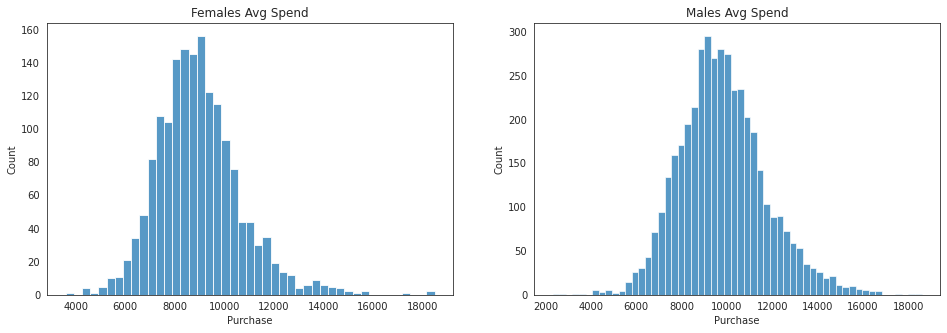

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=avg_amt_gender_walmart[avg_amt_gender_walmart['Gender']=='F']['Purchase'], ax=axs[0]).set_title("Females Avg Spend")
sns.histplot(data=avg_amt_gender_walmart[avg_amt_gender_walmart['Gender']=='M']['Purchase'], ax=axs[1]).set_title("Males Avg Spend")

In [ ]:
df = avg_amt_gender_walmart.groupby(["Gender"])[["Purchase"]].mean()
df["Percentage"] = (df["Purchase"]/df["Purchase"].sum())*100
df

,Purchase,Percentage
Gender,,
F,8965.198464,47.758187
M,9806.867524,52.241813


In [ ]:
df = avg_amt_gender_walmart.groupby(["Gender"])[["Purchase"]].sum()
df["Percentage"] = (df["Purchase"]/df["Purchase"].sum())*100
df

,Purchase,Percentage
Gender,,
F,1.493602e+07,26.496383
M,4.143402e+07,73.503617


In [116]:
avg_amt_male = avg_amt_gender_walmart[avg_amt_gender_walmart["Gender"]=="M"]
avg_amt_female = avg_amt_gender_walmart[avg_amt_gender_walmart["Gender"]=="F"]

In [117]:
#Finding the sample(sample size=1000) for avg purchase amount for males and females 
genders = ["M", "F"]
sample_size = 1000
num_repitions = 1000
avg_male_means = []
avg_female_means = []
for i in range(num_repitions):
    avg_male_mean = avg_amt_male.sample(sample_size, replace=True)['Purchase'].mean()
    avg_female_mean = avg_amt_female.sample(sample_size, replace=True)['Purchase'].mean()
    avg_male_means.append(avg_male_mean)
    avg_female_means.append(avg_female_mean)

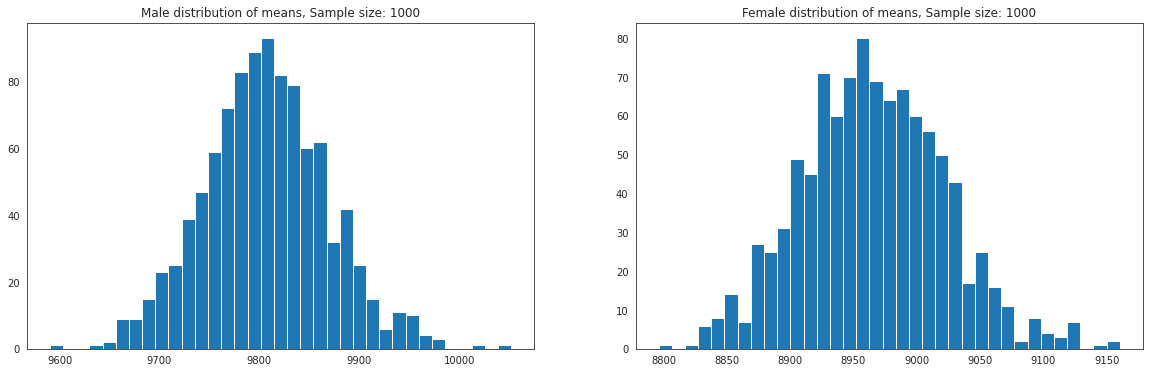

In [119]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(avg_male_means, bins=35)
axis[1].hist(avg_female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 1000")
axis[1].set_title("Female distribution of means, Sample size: 1000")

plt.show()

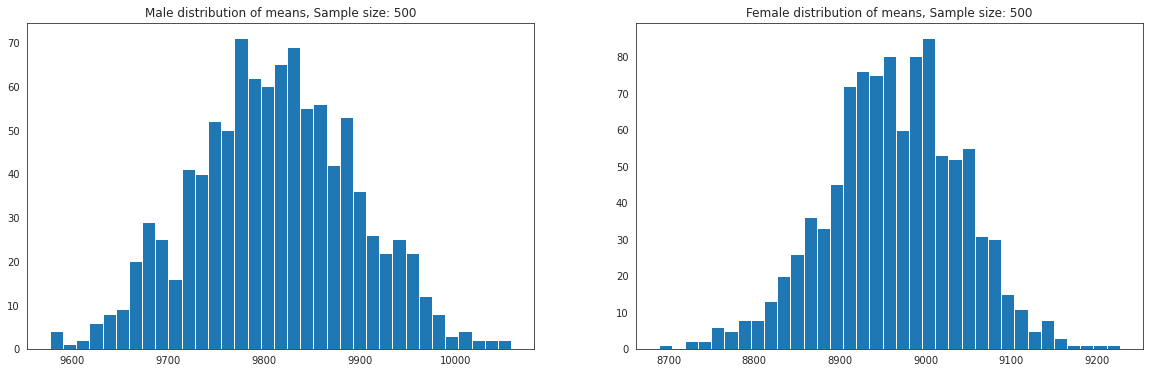

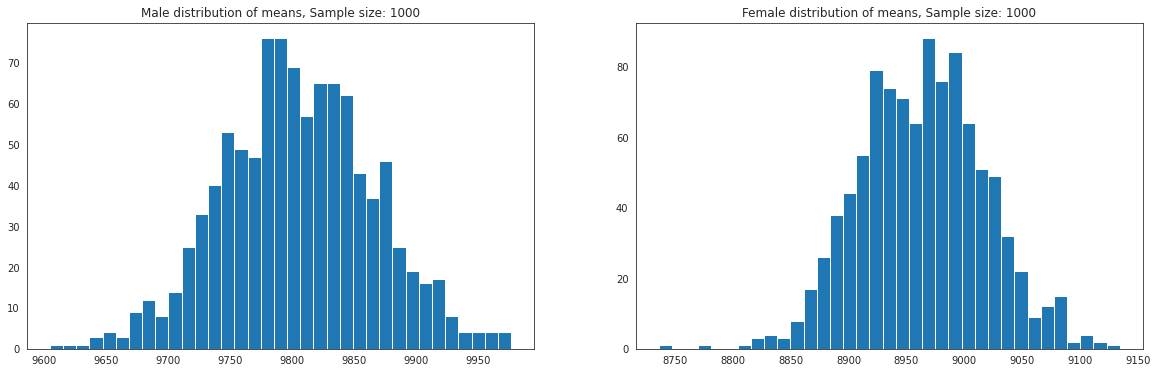

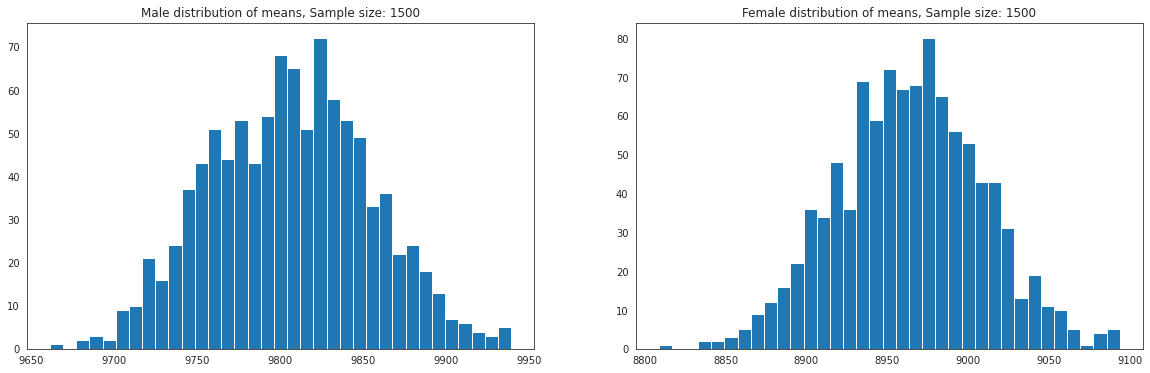

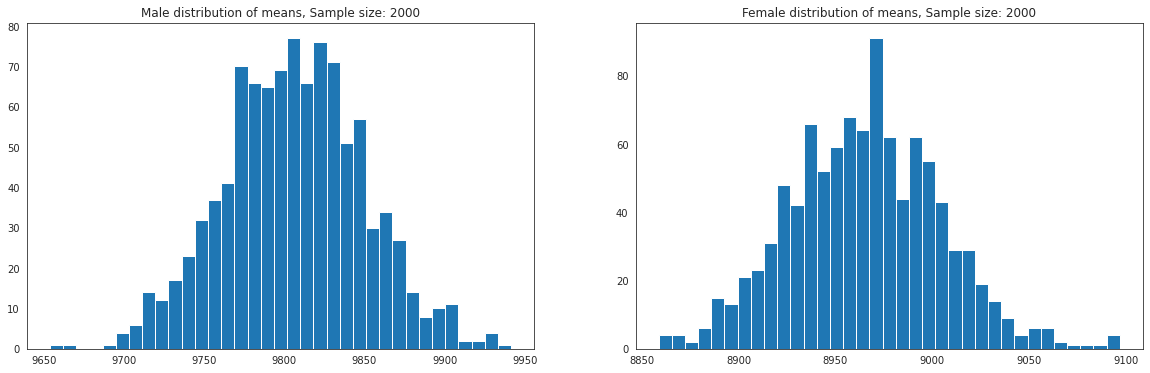

In [120]:
#Finding the sample(sample size=variable) for avg purchase amount for males and females 
genders = ["M", "F"]
sample_size_range = np.arange(500,2100,500) 
num_repitions = 1000
for sample_size in sample_size_range:
    avg_male_means = []
    avg_female_means = []
    for i in range(num_repitions):
        avg_male_mean = avg_amt_male.sample(sample_size, replace=True)['Purchase'].mean()
        avg_female_mean = avg_amt_female.sample(sample_size, replace=True)['Purchase'].mean()
        avg_male_means.append(avg_male_mean)
        avg_female_means.append(avg_female_mean)
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    axis[0].hist(avg_male_means, bins=35)
    axis[1].hist(avg_female_means, bins=35)
    axis[0].set_title("Male distribution of means, Sample size: {}".format(sample_size))
    axis[1].set_title("Female distribution of means, Sample size: {}".format(sample_size))
    plt.show()

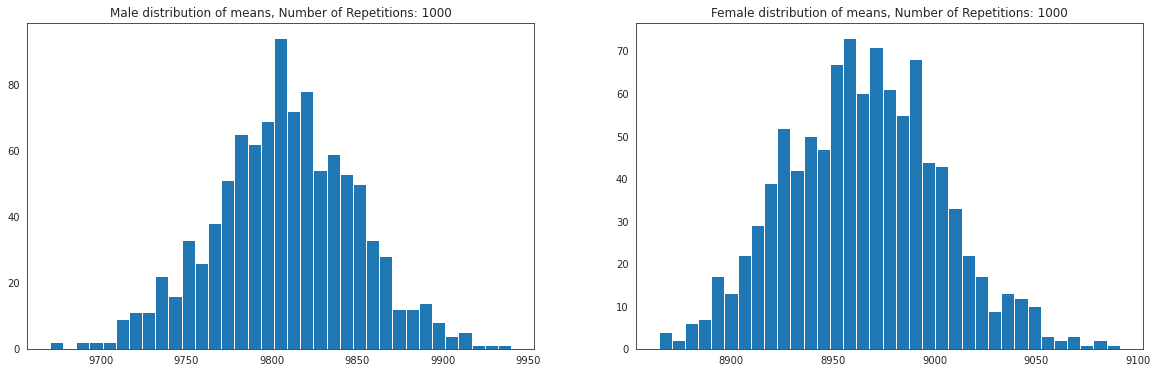

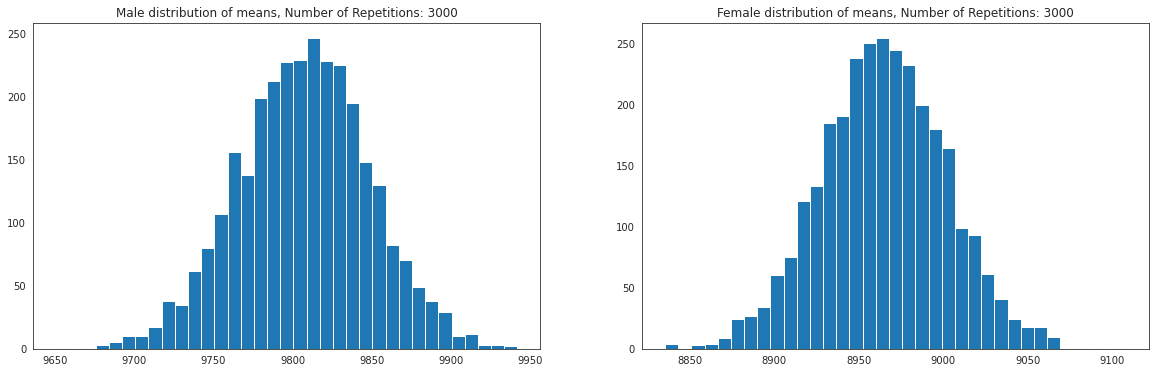

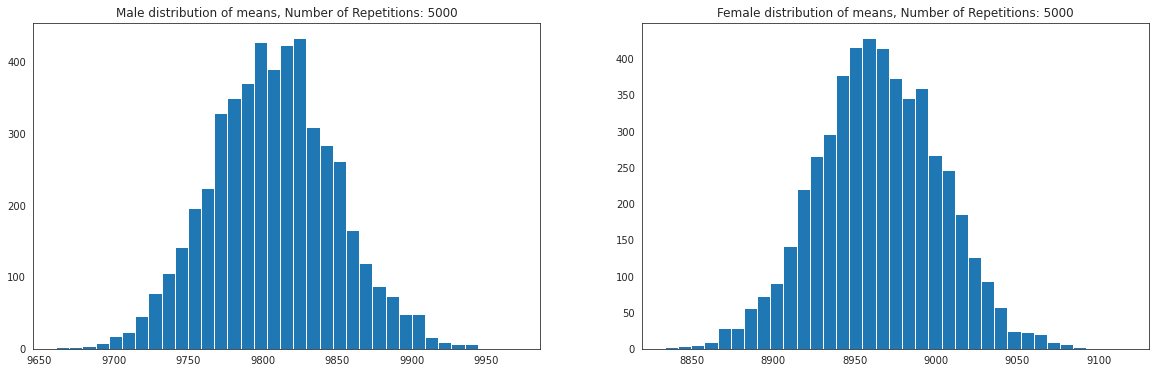

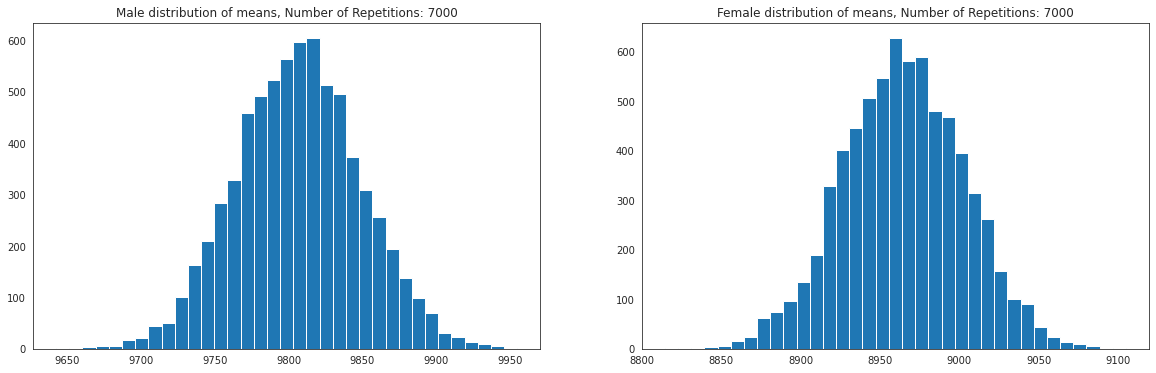

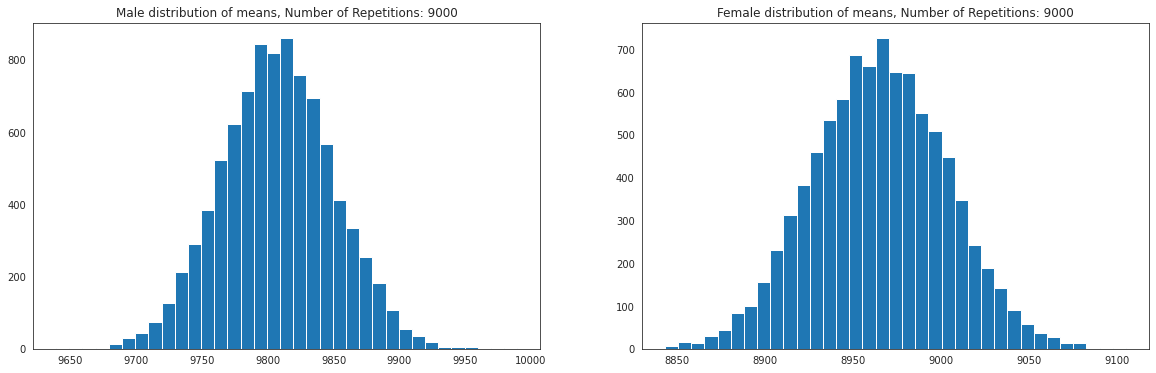

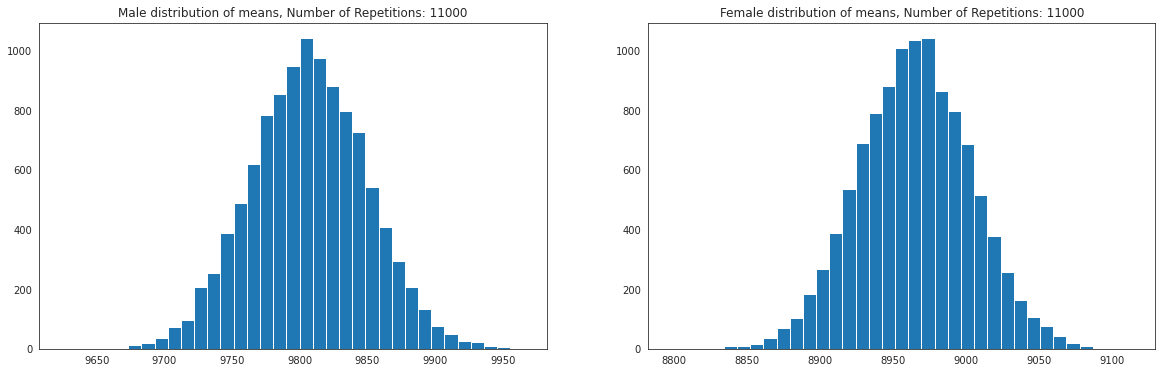

In [121]:
#Finding the sample(sample size=1000) for avg purchase amount for males and females 
genders = ["M", "F"]
sample_size_range = 1000
num_repitions_range= np.arange(1000,11001,2000) 
for num_repitions in num_repitions_range:
    avg_male_means = []
    avg_female_means = []
    for i in range(num_repitions):
        avg_male_mean = avg_amt_male.sample(sample_size, replace=True)['Purchase'].mean()
        avg_female_mean = avg_amt_female.sample(sample_size, replace=True)['Purchase'].mean()
        avg_male_means.append(avg_male_mean)
        avg_female_means.append(avg_female_mean)
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    axis[0].hist(avg_male_means, bins=35)
    axis[1].hist(avg_female_means, bins=35)
    axis[0].set_title("Male distribution of means, Number of Repetitions: {}".format(num_repitions))
    axis[1].set_title("Female distribution of means, Number of Repetitions: {}".format(num_repitions))
    plt.show()

Text(0, 0.5, 'Sample Mean for Male customers')

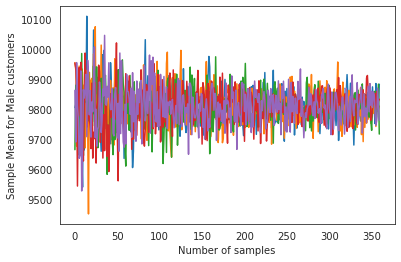

In [ ]:
sample_mean_male_trend = []
for person in range(5):
    for num_samples in range(200,2000,5):
        sample_male = avg_amt_male.sample(num_samples,replace = True)
        sample_mean_male = np.mean(sample_male["Purchase"])
        sample_mean_male_trend.append(sample_mean_male)
    plt.plot(sample_mean_male_trend)
    sample_mean_male_trend = []
plt.xlabel("Number of samples")
plt.ylabel("Sample Mean for Male customers")

Text(0, 0.5, 'Sample Mean for female customers')

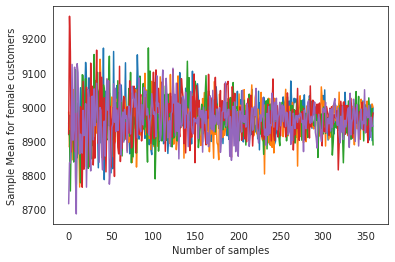

In [ ]:
sample_mean_female_trend = []
for person in range(5):
    for num_samples in range(200,2000,5):
        sample_female = avg_amt_female.sample(num_samples,replace = True)
        sample_mean_female = np.mean(sample_female["Purchase"])
        sample_mean_female_trend.append(sample_mean_female)
    plt.plot(sample_mean_female_trend)
    sample_mean_female_trend = []
plt.xlabel("Number of samples")
plt.ylabel("Sample Mean for female customers")

### Considering Total Purchase Value

In [ ]:
#Number of unique male and female customers
tot_amt_gender_walmart = walmart.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
tot_amt_gender_walmart = tot_amt_gender_walmart.reset_index()
tot_amt_gender_walmart.sort_values("Purchase",ascending = False)

,User_ID,Gender,Purchase
4166,1004277,M,10536909
1634,1001680,M,8699596
2831,1002909,M,7577756
1885,1001941,M,6817493
416,1000424,M,6573609
...,...,...,...
4866,1004991,F,52371
4989,1005117,F,49668
3782,1003883,M,49349
91,1000094,M,49288


Text(0.5, 1.0, 'Males tot Spend')

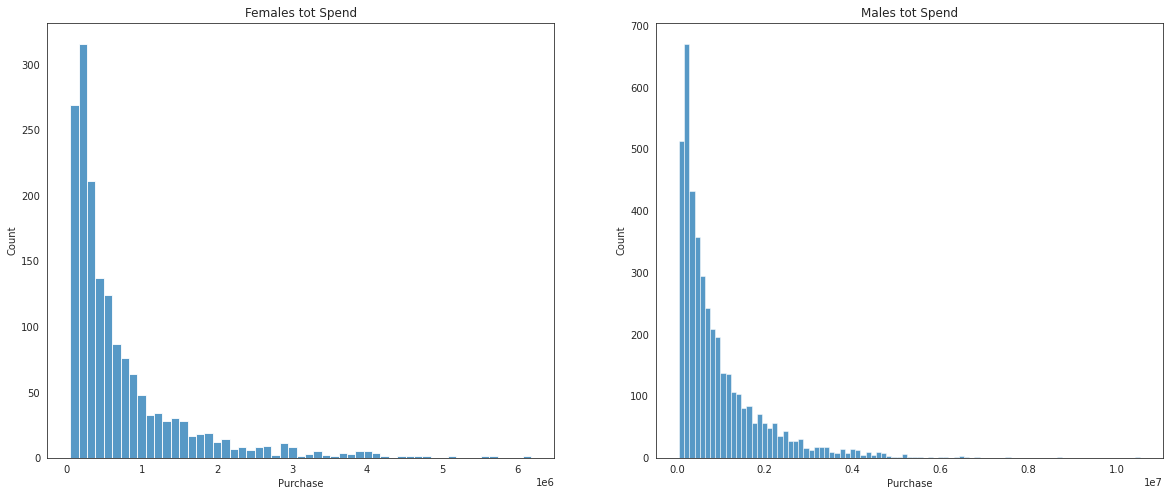

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.histplot(data=tot_amt_gender_walmart[tot_amt_gender_walmart['Gender']=='F']['Purchase'], ax=axs[0]).set_title("Females tot Spend")
sns.histplot(data=tot_amt_gender_walmart[tot_amt_gender_walmart['Gender']=='M']['Purchase'], ax=axs[1]).set_title("Males tot Spend")

In [ ]:
df = tot_amt_gender_walmart.groupby(["Gender"])[["Purchase"]].mean()
df["Percentage"] = (df["Purchase"]/df["Purchase"].sum())*100
df

,Purchase,Percentage
Gender,,
F,712024.394958,43.48589
M,925344.402367,56.51411


In [ ]:
df = tot_amt_gender_walmart.groupby(["Gender"])[["Purchase"]].sum()
df["Percentage"] = (df["Purchase"]/df["Purchase"].sum())*100
df

,Purchase,Percentage
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


In [122]:
tot_amt_male = tot_amt_gender_walmart[tot_amt_gender_walmart["Gender"]=="M"]
tot_amt_female = tot_amt_gender_walmart[tot_amt_gender_walmart["Gender"]=="F"]

In [123]:
#Finding the sample(sample size=1000) for tot purchase amount for males and females 
genders = ["M", "F"]
sample_size = 1000
num_repitions = 1000
tot_male_means = []
tot_female_means = []
for i in range(num_repitions):
    tot_male_mean = tot_amt_male.sample(sample_size, replace=True)['Purchase'].mean()
    tot_female_mean = tot_amt_female.sample(sample_size, replace=True)['Purchase'].mean()
    tot_male_means.append(tot_male_mean)
    tot_female_means.append(tot_female_mean)

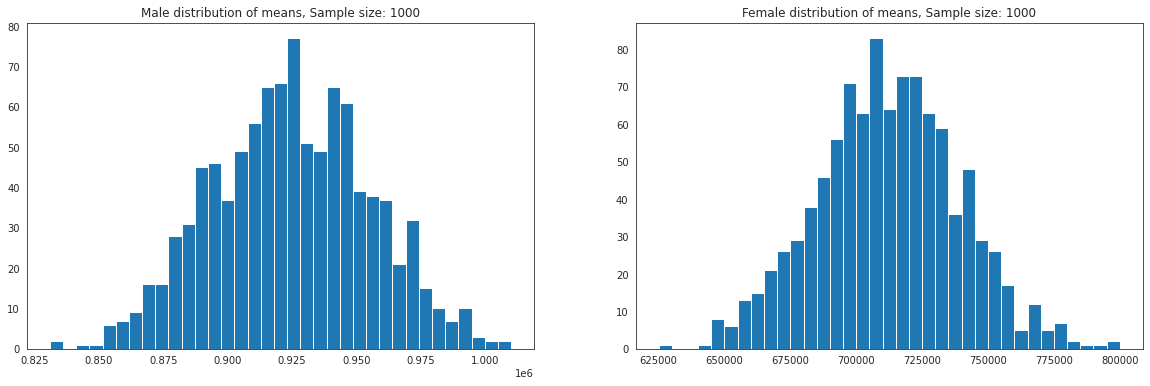

In [125]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(tot_male_means, bins=35)
axis[1].hist(tot_female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 1000")
axis[1].set_title("Female distribution of means, Sample size: 1000")
plt.show()

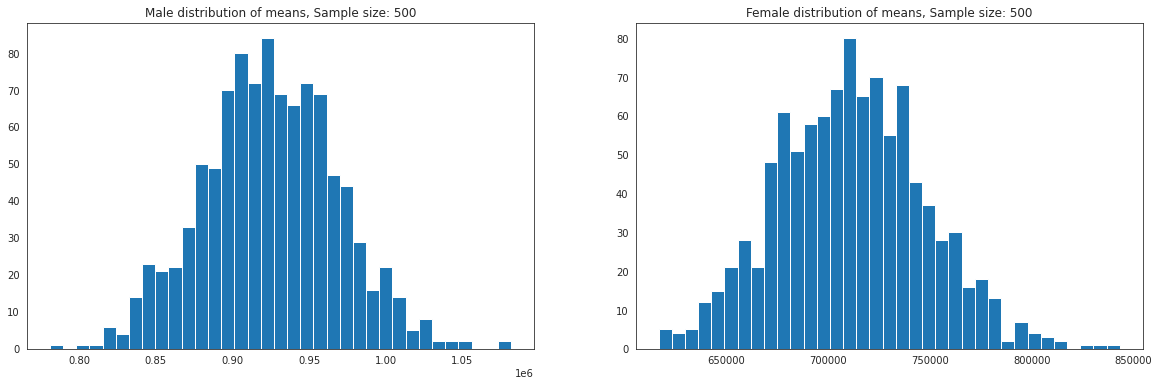

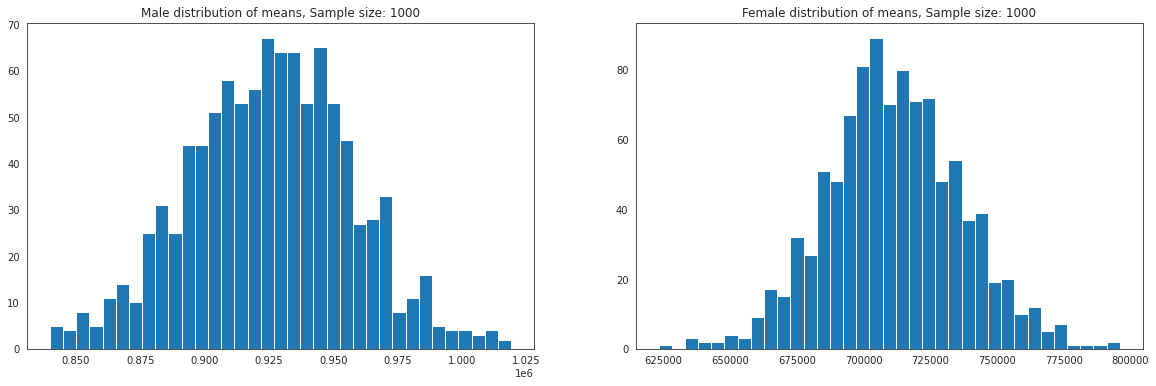

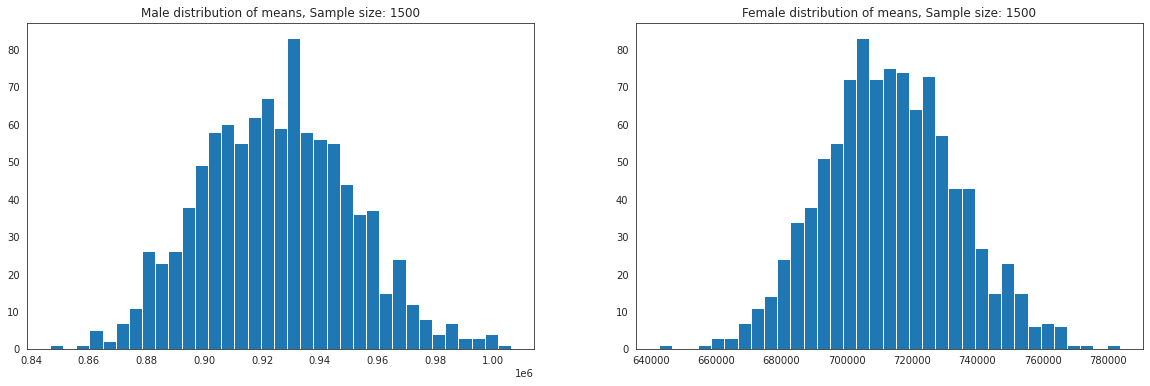

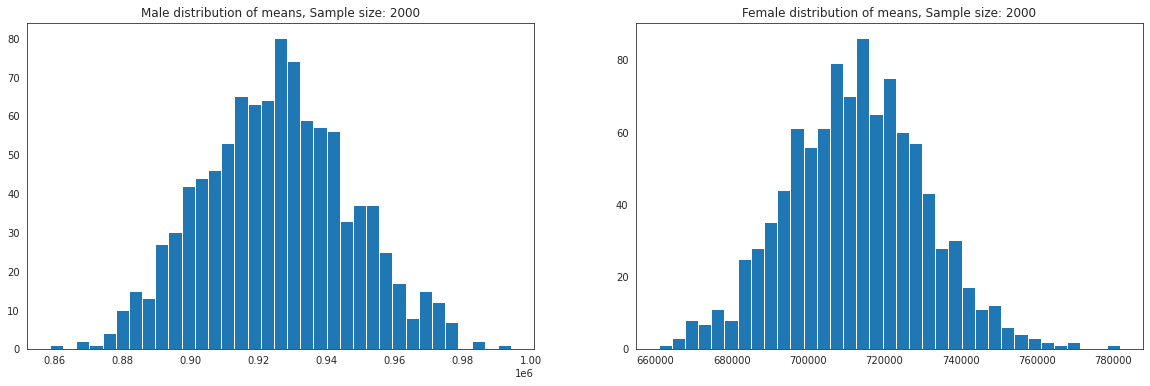

In [ ]:
#Finding the sample(sample size=1000) for tot purchase amount for males and females 
genders = ["M", "F"]
sample_size_range = np.arange(500,2100,500) 
num_repitions = 1000
for sample_size in sample_size_range:
    tot_male_means = []
    tot_female_means = []
    for i in range(num_repitions):
        tot_male_mean = tot_amt_male.sample(sample_size, replace=True)['Purchase'].mean()
        tot_female_mean = tot_amt_female.sample(sample_size, replace=True)['Purchase'].mean()
        tot_male_means.append(tot_male_mean)
        tot_female_means.append(tot_female_mean)
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    axis[0].hist(tot_male_means, bins=35)
    axis[1].hist(tot_female_means, bins=35)
    axis[0].set_title("Male distribution of means, Sample size: {}".format(sample_size))
    axis[1].set_title("Female distribution of means, Sample size: {}".format(sample_size))
    plt.show()

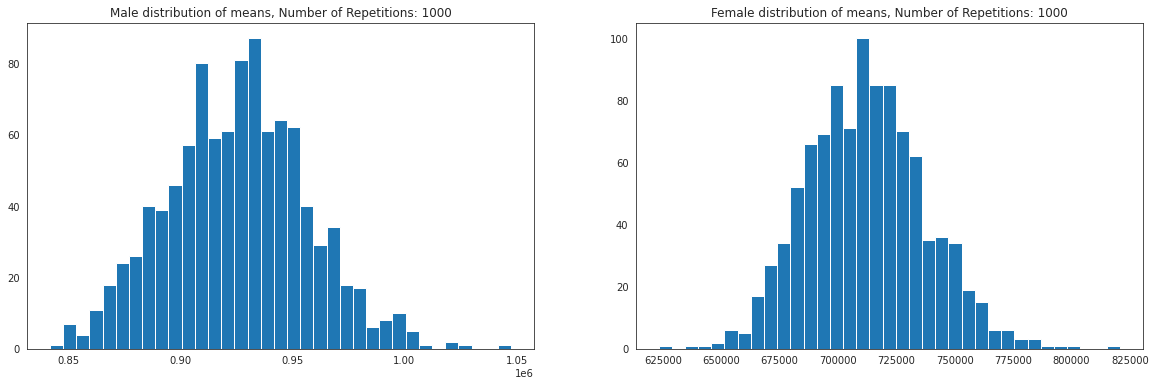

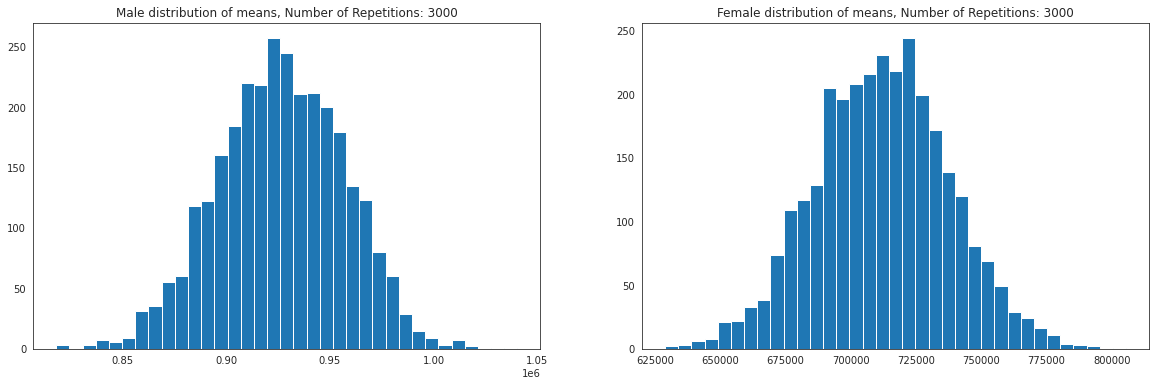

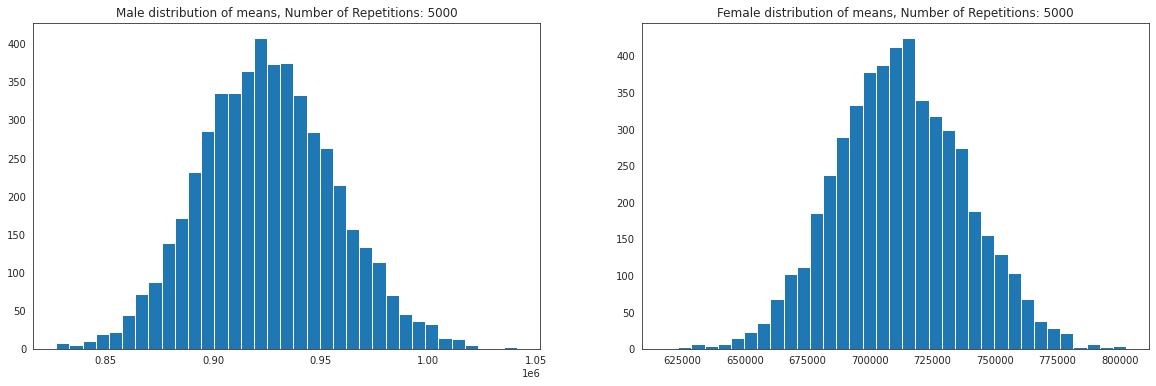

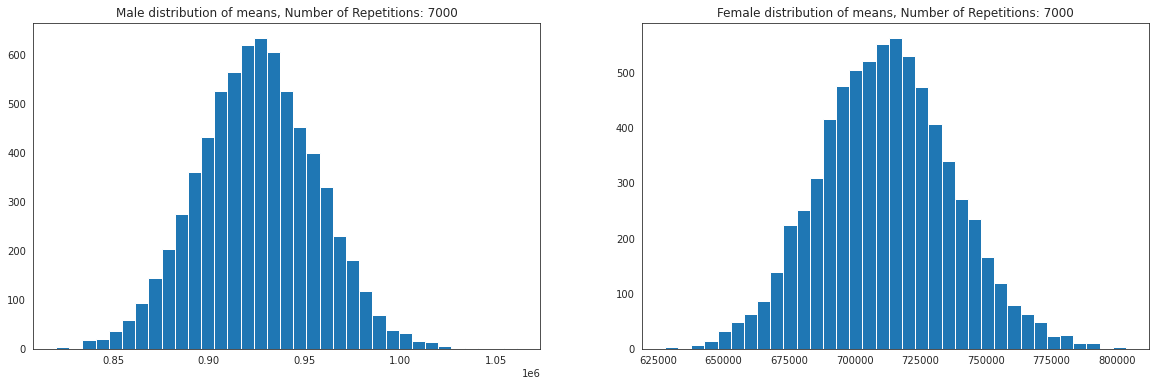

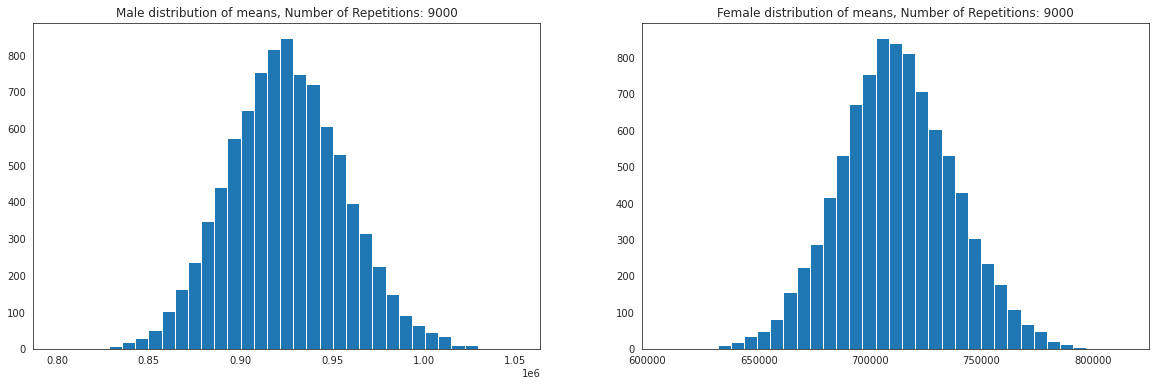

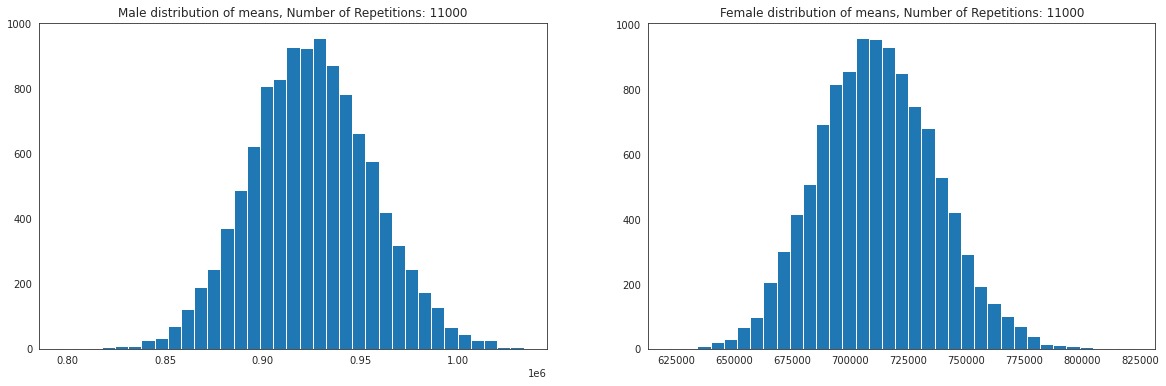

In [126]:
#Finding the sample(sample size=1000) for tot purchase amount for males and females 
genders = ["M", "F"]
sample_size_range = 1000
num_repitions_range= np.arange(1000,11001,2000) 
for num_repitions in num_repitions_range:
    tot_male_means = []
    tot_female_means = []
    for i in range(num_repitions):
        tot_male_mean = tot_amt_male.sample(sample_size, replace=True)['Purchase'].mean()
        tot_female_mean = tot_amt_female.sample(sample_size, replace=True)['Purchase'].mean()
        tot_male_means.append(tot_male_mean)
        tot_female_means.append(tot_female_mean)
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    axis[0].hist(tot_male_means, bins=35)
    axis[1].hist(tot_female_means, bins=35)
    axis[0].set_title("Male distribution of means, Number of Repetitions: {}".format(num_repitions))
    axis[1].set_title("Female distribution of means, Number of Repetitions: {}".format(num_repitions))
    plt.show()

Text(0, 0.5, 'Sample Mean for Male customers')

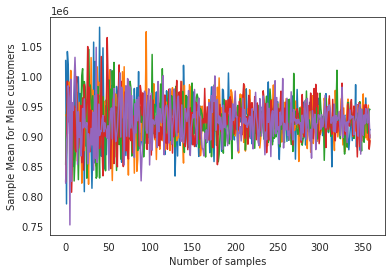

In [ ]:
sample_mean_male_trend = []
for person in range(5):
    for num_samples in range(200,2000,5):
        sample_male = tot_amt_male.sample(num_samples,replace = True)
        sample_mean_male = np.mean(sample_male["Purchase"])
        sample_mean_male_trend.append(sample_mean_male)
    plt.plot(sample_mean_male_trend)
    sample_mean_male_trend = []
plt.xlabel("Number of samples")
plt.ylabel("Sample Mean for Male customers")

Text(0, 0.5, 'Sample Mean for female customers')

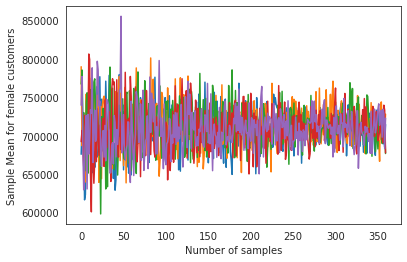

In [ ]:
sample_mean_female_trend = []
for person in range(5):
    for num_samples in range(200,2000,5):
        sample_female = tot_amt_female.sample(num_samples,replace = True)
        sample_mean_female = np.mean(sample_female["Purchase"])
        sample_mean_female_trend.append(sample_mean_female)
    plt.plot(sample_mean_female_trend)
    sample_mean_female_trend = []
plt.xlabel("Number of samples")
plt.ylabel("Sample Mean for female customers")

##**Calculating 90%, 95% and 99% confidence intervals for Gender Vs Purchase for various sample sizes and number of repetitions:**

###Considering Average Purchase value

In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=(norm.ppf(0.95)-norm.ppf(0.05))/2#90% Confidence Interval
z95=(norm.ppf(0.975)-norm.ppf(0.025))/2 #95% Confidence Interval
z99=(norm.ppf(0.995)-norm.ppf(0.005))/2 #99% Confidence Interval

L = [z90,z95,z99]
P = [90,95,99]
k = 0
for i in L:
    print(f"For {P[k]}% confidence interval",end="\n\n")
    k += 1

    print("Population avg spend amount for Male: {:.2f}".format(avg_amt_male['Purchase'].mean()))
    print("Population avg spend amount for Female: {:.2f}\n".format(avg_amt_female['Purchase'].mean()))

    print("Sample avg spend amount for Male: {:.2f}".format(np.mean(avg_male_means)))
    print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(avg_female_means)))

    print("Sample std for Male: {:.2f}".format(pd.Series(avg_male_means).std()))
    print("Sample std for Female: {:.2f}\n".format(pd.Series(avg_female_means).std()))

    print("Sample std error for Male: {:.2f}".format(pd.Series(avg_male_means).std()/np.sqrt(1000))) 
    print("Sample std error for Female: {:.2f}\n".format(pd.Series(avg_female_means).std()/np.sqrt(1000)))

    sample_mean_male=np.mean(avg_male_means)
    sample_mean_female=np.mean(avg_female_means)

    sample_std_male=pd.Series(avg_male_means).std()
    sample_std_female=pd.Series(avg_female_means).std()

    sample_std_error_male=sample_std_male/np.sqrt(1000)
    sample_std_error_female=sample_std_female/np.sqrt(1000)

    Upper_Limit_male=i*sample_std_error_male + sample_mean_male
    Lower_Limit_male=sample_mean_male - i*sample_std_error_male

    Upper_Limit_female=i*sample_std_error_female + sample_mean_female
    Lower_Limit_female=sample_mean_female - i*sample_std_error_female

    print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
    print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female],end="\n"*4)

For 90% confidence interval

Population avg spend amount for Male: 9806.87
Population avg spend amount for Female: 8965.20

Sample avg spend amount for Male: 9800.38
Sample avg spend amount for Female: 8966.96

Sample std for Male: 134.96
Sample std for Female: 119.61

Sample std error for Male: 4.27
Sample std error for Female: 3.78

Male_CI:  [9793.362178087145, 9807.401544678165]
Female_CI:  [8960.734025589201, 8973.176916867775]



For 95% confidence interval

Population avg spend amount for Male: 9806.87
Population avg spend amount for Female: 8965.20

Sample avg spend amount for Male: 9800.38
Sample avg spend amount for Female: 8966.96

Sample std for Male: 134.96
Sample std for Female: 119.61

Sample std error for Male: 4.27
Sample std error for Female: 3.78

Male_CI:  [9792.017392826521, 9808.74632993879]
Female_CI:  [8959.542161505984, 8974.368780950992]



For 99% confidence interval

Population avg spend amount for Male: 9806.87
Population avg spend amount for Female: 8965.2

In [127]:
#Finding the sample(sample size=varies from 500 to 2000) for avg purchase amount for males and females 
genders = ["M", "F"]
sample_size_range = np.arange(500,2100,500)
num_repitions = 1000
for sample_size in sample_size_range:
    print("FOR SAMPLE SIZE = {}".format(sample_size),end="\n"*2)
    avg_male_means = []
    avg_female_means = []
    for i in range(num_repitions):
        avg_male_mean = avg_amt_male.sample(sample_size, replace=True)['Purchase'].mean()
        avg_female_mean = avg_amt_female.sample(sample_size, replace=True)['Purchase'].mean()
        avg_male_means.append(avg_male_mean)
        avg_female_means.append(avg_female_mean)

    #Taking the values for z at 90%, 95% and 99% confidence interval as:
    z90=(norm.ppf(0.95)-norm.ppf(0.05))/2#90% Confidence Interval
    z95=(norm.ppf(0.975)-norm.ppf(0.025))/2 #95% Confidence Interval
    z99=(norm.ppf(0.995)-norm.ppf(0.005))/2 #99% Confidence Interval

    L = [z90,z95,z99]
    P = [90,95,99]
    k = 0
    for i in L:
        print(f"For {P[k]}% confidence interval",end="\n\n")
        k += 1

        print("Population avg spend amount for Male: {:.2f}".format(avg_amt_male['Purchase'].mean()))
        print("Population avg spend amount for Female: {:.2f}\n".format(avg_amt_female['Purchase'].mean()))

        print("Sample avg spend amount for Male: {:.2f}".format(np.mean(avg_male_means)))
        print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(avg_female_means)))

        print("Sample std for Male: {:.2f}".format(pd.Series(avg_male_means).std()))
        print("Sample std for Female: {:.2f}\n".format(pd.Series(avg_female_means).std()))

        print("Sample std error for Male: {:.2f}".format(pd.Series(avg_male_means).std()/np.sqrt(sample_size))) 
        print("Sample std error for Female: {:.2f}\n".format(pd.Series(avg_female_means).std()/np.sqrt(sample_size)))

        sample_mean_male=np.mean(avg_male_means)
        sample_mean_female=np.mean(avg_female_means)

        sample_std_male=pd.Series(avg_male_means).std()
        sample_std_female=pd.Series(avg_female_means).std()

        sample_std_error_male=sample_std_male/np.sqrt(sample_size)
        sample_std_error_female=sample_std_female/np.sqrt(sample_size)

        Upper_Limit_male=i*sample_std_error_male + sample_mean_male
        Lower_Limit_male=sample_mean_male - i*sample_std_error_male

        Upper_Limit_female=i*sample_std_error_female + sample_mean_female
        Lower_Limit_female=sample_mean_female - i*sample_std_error_female

        print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
        print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female],end="\n"*4)

FOR SAMPLE SIZE = 500

For 90% confidence interval

Population avg spend amount for Male: 9806.87
Population avg spend amount for Female: 8965.20

Sample avg spend amount for Male: 9810.27
Sample avg spend amount for Female: 8963.79

Sample std for Male: 89.09
Sample std for Female: 75.85

Sample std error for Male: 3.98
Sample std error for Female: 3.39

Male_CI:  [9803.720275371403, 9816.827398562551]
Female_CI:  [8958.213459866189, 8969.37237874474]



For 95% confidence interval

Population avg spend amount for Male: 9806.87
Population avg spend amount for Female: 8965.20

Sample avg spend amount for Male: 9810.27
Sample avg spend amount for Female: 8963.79

Sample std for Male: 89.09
Sample std for Female: 75.85

Sample std error for Male: 3.98
Sample std error for Female: 3.39

Male_CI:  [9802.464786673792, 9818.082887260161]
Female_CI:  [8957.144583322857, 8970.441255288071]



For 99% confidence interval

Population avg spend amount for Male: 9806.87
Population avg spend amount

###Considering Total Purchase Value

In [178]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=(norm.ppf(0.95)-norm.ppf(0.05))/2#90% Confidence Interval
z95=(norm.ppf(0.975)-norm.ppf(0.025))/2 #95% Confidence Interval
z99=(norm.ppf(0.995)-norm.ppf(0.005))/2 #99% Confidence Interval

L = [z90,z95,z99]
P = [90,95,99]
k = 0
for i in L:
    print(f"For {P[k]}% confidence interval",end="\n\n")
    k += 1

    print("Population tot spend amount for Male: {:.2f}".format(tot_amt_male['Purchase'].mean()))
    print("Population tot spend amount for Female: {:.2f}\n".format(tot_amt_female['Purchase'].mean()))

    print("Sample tot spend amount for Male: {:.2f}".format(np.mean(tot_male_means)))
    print("Sample tot spend amount for Female: {:.2f}\n".format(np.mean(tot_female_means)))

    print("Sample std for Male: {:.2f}".format(pd.Series(tot_male_means).std()))
    print("Sample std for Female: {:.2f}\n".format(pd.Series(tot_female_means).std()))

    print("Sample std error for Male: {:.2f}".format(pd.Series(tot_male_means).std()/np.sqrt(1000))) 
    print("Sample std error for Female: {:.2f}\n".format(pd.Series(tot_female_means).std()/np.sqrt(1000)))

    sample_mean_male=np.mean(tot_male_means)
    sample_mean_female=np.mean(tot_female_means)

    sample_std_male=pd.Series(tot_male_means).std()
    sample_std_female=pd.Series(tot_female_means).std()

    sample_std_error_male=sample_std_male/np.sqrt(1000)
    sample_std_error_female=sample_std_female/np.sqrt(1000)

    Upper_Limit_male=i*sample_std_error_male + sample_mean_male
    Lower_Limit_male=sample_mean_male - i*sample_std_error_male

    Upper_Limit_female=i*sample_std_error_female + sample_mean_female
    Lower_Limit_female=sample_mean_female - i*sample_std_error_female

    print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
    print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female],end="\n"*4)

For 90% confidence interval

Population tot spend amount for Male: 925344.40
Population tot spend amount for Female: 712024.39

Sample tot spend amount for Male: 924555.04
Sample tot spend amount for Female: 710115.59

Sample std for Male: 70675.37
Sample std for Female: 59496.85

Sample std error for Male: 2234.95
Sample std error for Female: 1881.46

Male_CI:  [920878.8715874696, 928231.2073825303]
Female_CI:  [707020.874182807, 713210.3124171929]



For 95% confidence interval

Population tot spend amount for Male: 925344.40
Population tot spend amount for Female: 712024.39

Sample tot spend amount for Male: 924555.04
Sample tot spend amount for Female: 710115.59

Sample std for Male: 70675.37
Sample std for Female: 59496.85

Sample std error for Male: 2234.95
Sample std error for Female: 1881.46

Male_CI:  [920174.6152562278, 928935.4637137721]
Female_CI:  [706428.0080264049, 713803.178573595]



For 99% confidence interval

Population tot spend amount for Male: 925344.40
Populatio

In [128]:
#Finding the sample(sample size=varies from 200 to 2000) for tot purchase amount for males and females 
genders = ["M", "F"]
sample_size_range = np.arange(500,2100,500)
num_repitions = 1000
for sample_size in sample_size_range:
    print("FOR SAMPLE SIZE = {}".format(sample_size),end="\n"*2)
    tot_male_means = []
    tot_female_means = []
    for i in range(num_repitions):
        tot_male_mean = tot_amt_male.sample(sample_size, replace=True)['Purchase'].mean()
        tot_female_mean = tot_amt_female.sample(sample_size, replace=True)['Purchase'].mean()
        tot_male_means.append(tot_male_mean)
        tot_female_means.append(tot_female_mean)

    #Taking the values for z at 90%, 95% and 99% confidence interval as:
    z90=(norm.ppf(0.95)-norm.ppf(0.05))/2#90% Confidence Interval
    z95=(norm.ppf(0.975)-norm.ppf(0.025))/2 #95% Confidence Interval
    z99=(norm.ppf(0.995)-norm.ppf(0.005))/2 #99% Confidence Interval

    L = [z90,z95,z99]
    P = [90,95,99]
    k = 0
    for i in L:
        print(f"For {P[k]}% confidence interval",end="\n\n")
        k += 1

        print("Population tot spend amount for Male: {:.2f}".format(tot_amt_male['Purchase'].mean()))
        print("Population tot spend amount for Female: {:.2f}\n".format(tot_amt_female['Purchase'].mean()))

        print("Sample tot spend amount for Male: {:.2f}".format(np.mean(tot_male_means)))
        print("Sample tot spend amount for Female: {:.2f}\n".format(np.mean(tot_female_means)))

        print("Sample std for Male: {:.2f}".format(pd.Series(tot_male_means).std()))
        print("Sample std for Female: {:.2f}\n".format(pd.Series(tot_female_means).std()))

        print("Sample std error for Male: {:.2f}".format(pd.Series(tot_male_means).std()/np.sqrt(sample_size))) 
        print("Sample std error for Female: {:.2f}\n".format(pd.Series(tot_female_means).std()/np.sqrt(sample_size)))

        sample_mean_male=np.mean(tot_male_means)
        sample_mean_female=np.mean(tot_female_means)

        sample_std_male=pd.Series(tot_male_means).std()
        sample_std_female=pd.Series(tot_female_means).std()

        sample_std_error_male=sample_std_male/np.sqrt(sample_size)
        sample_std_error_female=sample_std_female/np.sqrt(sample_size)

        Upper_Limit_male=i*sample_std_error_male + sample_mean_male
        Lower_Limit_male=sample_mean_male - i*sample_std_error_male

        Upper_Limit_female=i*sample_std_error_female + sample_mean_female
        Lower_Limit_female=sample_mean_female - i*sample_std_error_female

        print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
        print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female],end="\n"*4)

FOR SAMPLE SIZE = 500

For 90% confidence interval

Population tot spend amount for Male: 925344.40
Population tot spend amount for Female: 712024.39

Sample tot spend amount for Male: 923808.85
Sample tot spend amount for Female: 711065.24

Sample std for Male: 45111.39
Sample std for Female: 36756.98

Sample std error for Male: 2017.44
Sample std error for Female: 1643.82

Male_CI:  [920490.4471935608, 927127.2435784392]
Female_CI:  [708361.3956577323, 713769.0893302677]



For 95% confidence interval

Population tot spend amount for Male: 925344.40
Population tot spend amount for Female: 712024.39

Sample tot spend amount for Male: 923808.85
Sample tot spend amount for Female: 711065.24

Sample std for Male: 45111.39
Sample std for Female: 36756.98

Sample std error for Male: 2017.44
Sample std error for Female: 1643.82

Male_CI:  [919854.7300550219, 927762.9607169781]
Female_CI:  [707843.4102701691, 714287.0747178309]



For 99% confidence interval

Population tot spend amount for 

##**CLT and Confindence Intervals of Marital Status Vs Purchase**

###Considering Average Purchase Value

In [81]:
#Number of unique male and female customers
avg_amt_Marital_Status_walmart = walmart.groupby(['User_ID', 'Marital_Status'])[['Purchase']].mean()
avg_amt_Marital_Status_walmart = avg_amt_Marital_Status_walmart.reset_index()
avg_amt_Marital_Status_walmart["Marital_Status"].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

Available Population data with Mean Purchase value of each Customer

In [82]:
#Population data
avg_amt_Marital_Status_walmart.sort_values("Purchase",ascending = False)

,User_ID,Marital_Status,Purchase
3801,1003902,0,18577.893617
4943,1005069,1,18490.166667
5849,1005999,1,18345.944444
1307,1001349,1,18162.739130
3367,1003461,0,17508.700000
...,...,...,...
4521,1004636,1,3612.812500
5794,1005944,0,3599.733333
2667,1002744,1,3421.521739
3500,1003598,0,2698.357143


Text(0.5, 1.0, 'Married Avg Spend')

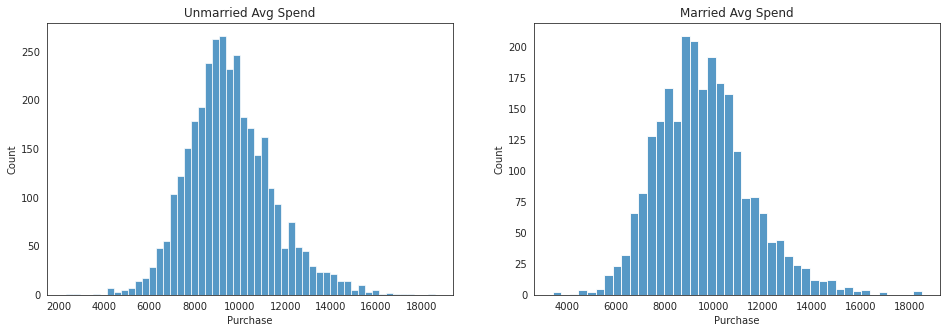

In [84]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=avg_amt_Marital_Status_walmart[avg_amt_Marital_Status_walmart['Marital_Status']==0]['Purchase'], ax=axs[0]).set_title("Unmarried Avg Spend")
sns.histplot(data=avg_amt_Marital_Status_walmart[avg_amt_Marital_Status_walmart['Marital_Status']==1]['Purchase'], ax=axs[1]).set_title("Married Avg Spend")

In [85]:
df = avg_amt_Marital_Status_walmart.groupby(["Marital_Status"])[["Purchase"]].mean()
df["Percentage"] = (df["Purchase"]/df["Purchase"].sum())*100
df

,Purchase,Percentage
Marital_Status,,
0,9564.407142,49.972426
1,9574.962299,50.027574


In [86]:
df = avg_amt_Marital_Status_walmart.groupby(["Marital_Status"])[["Purchase"]].sum()
df["Percentage"] = (df["Purchase"]/df["Purchase"].sum())*100
df

,Purchase,Percentage
Marital_Status,,
0,3.268158e+07,57.976864
1,2.368846e+07,42.023136


In [129]:
avg_amt_Married = avg_amt_Marital_Status_walmart[avg_amt_Marital_Status_walmart["Marital_Status"]==1]
avg_amt_Unmarried = avg_amt_Marital_Status_walmart[avg_amt_Marital_Status_walmart["Marital_Status"]==0]

In [130]:
#Finding the sample(sample size=1000) for avg purchase amount for males and females 
Marital_Statuses = [0,1]
sample_size = 1000
num_repitions = 1000
avg_Unmarried_means = []
avg_Married_means = []
for i in range(num_repitions):
    avg_Unmarried_mean = avg_amt_Unmarried.sample(sample_size, replace=True)['Purchase'].mean()
    avg_Married_mean = avg_amt_Married.sample(sample_size, replace=True)['Purchase'].mean()
    avg_Unmarried_means.append(avg_Unmarried_mean)
    avg_Married_means.append(avg_Married_mean)

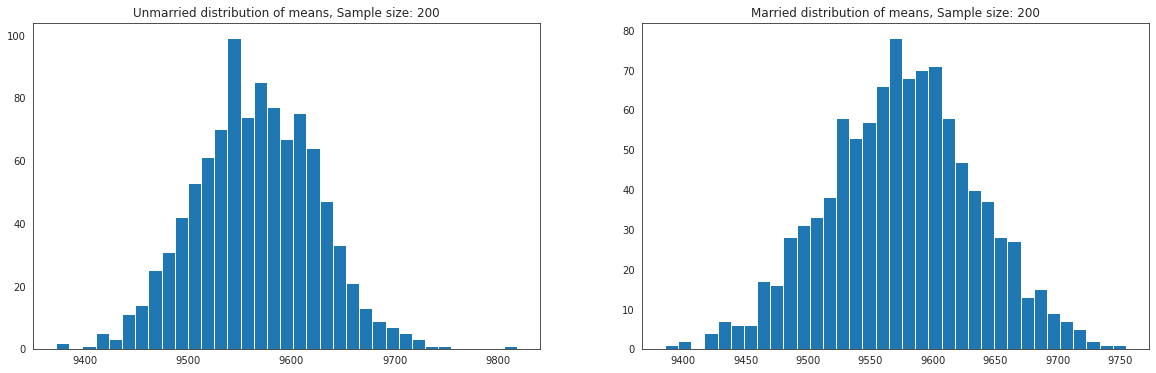

In [131]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(avg_Unmarried_means, bins=35)
axis[1].hist(avg_Married_means, bins=35)
axis[0].set_title("Unmarried distribution of means, Sample size: 200")
axis[1].set_title("Married distribution of means, Sample size: 200")

plt.show()

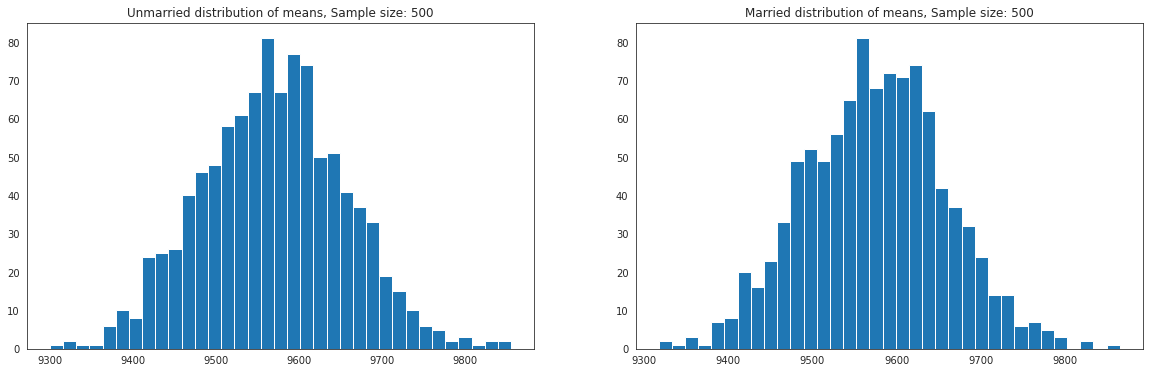

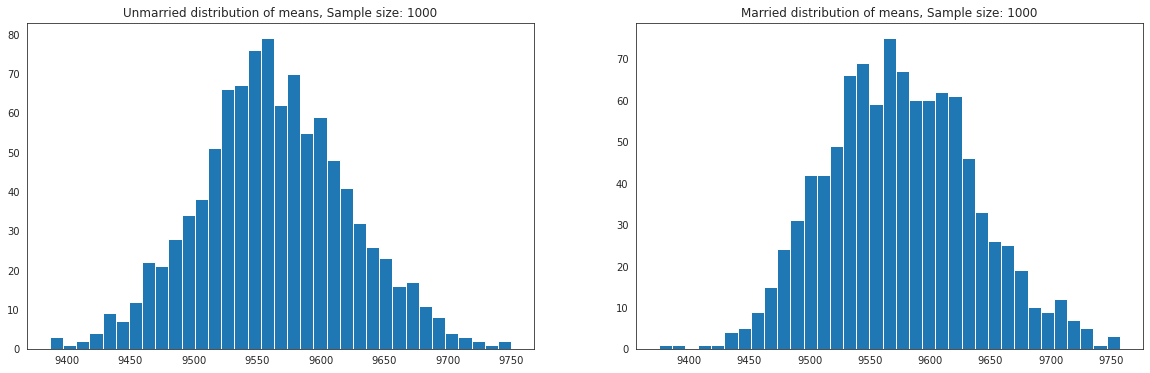

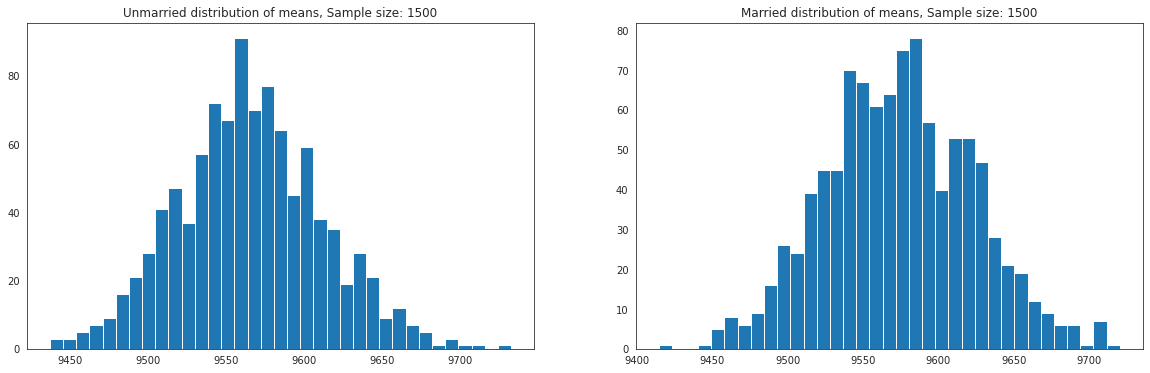

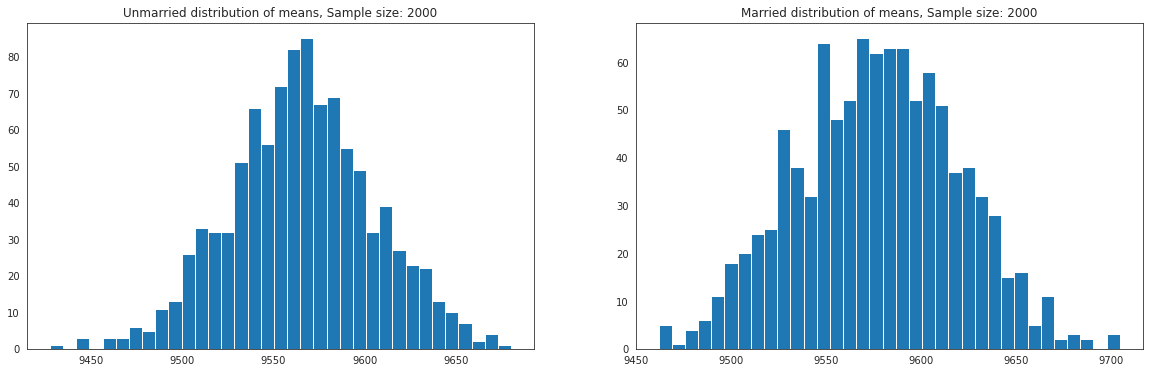

In [90]:
#Finding the sample(sample size=1000) for avg purchase amount for Unmarrieds and Marrieds 
Marital_Statuses = [0,1]
sample_size_range = np.arange(500,2100,500) 
num_repitions = 1000
for sample_size in sample_size_range:
    avg_Unmarried_means = []
    avg_Married_means = []
    for i in range(num_repitions):
        avg_Unmarried_mean = avg_amt_Unmarried.sample(sample_size, replace=True)['Purchase'].mean()
        avg_Married_mean = avg_amt_Married.sample(sample_size, replace=True)['Purchase'].mean()
        avg_Unmarried_means.append(avg_Unmarried_mean)
        avg_Married_means.append(avg_Married_mean)
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    axis[0].hist(avg_Unmarried_means, bins=35)
    axis[1].hist(avg_Married_means, bins=35)
    axis[0].set_title("Unmarried distribution of means, Sample size: {}".format(sample_size))
    axis[1].set_title("Married distribution of means, Sample size: {}".format(sample_size))
    plt.show()

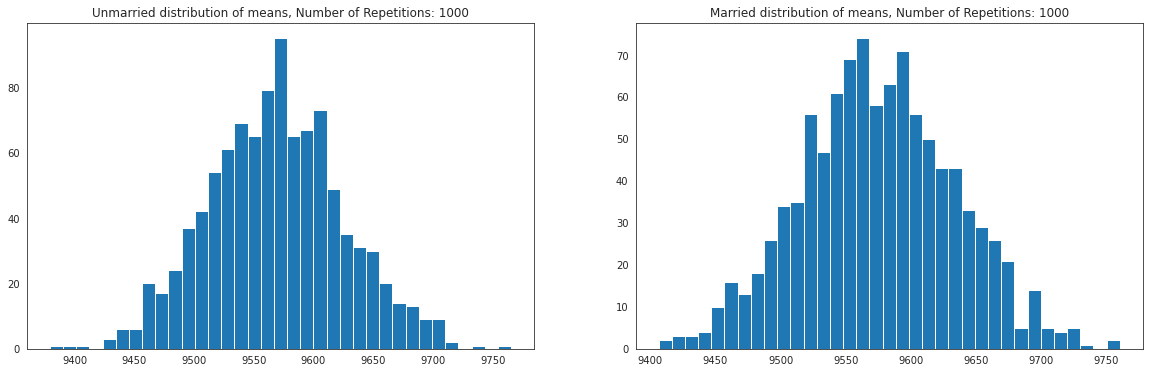

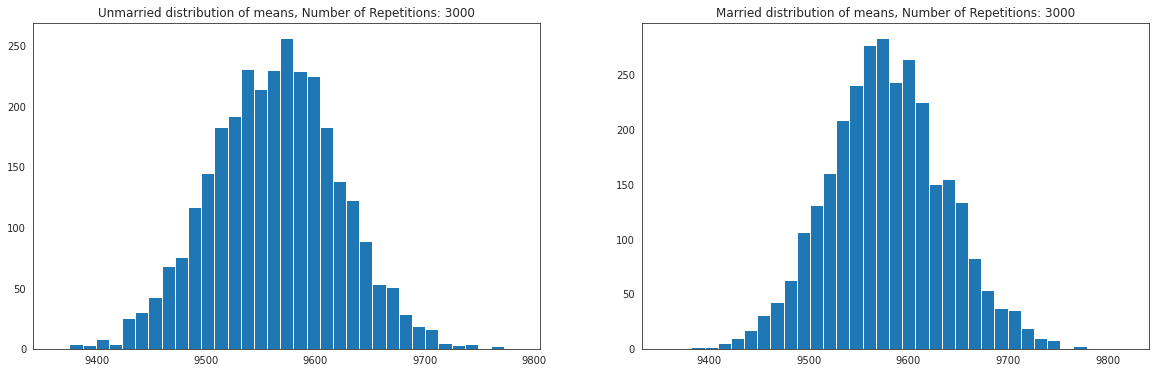

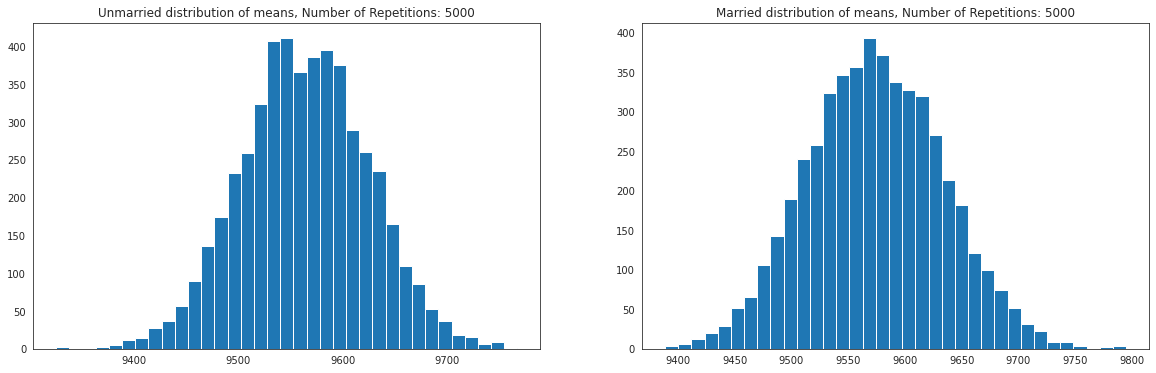

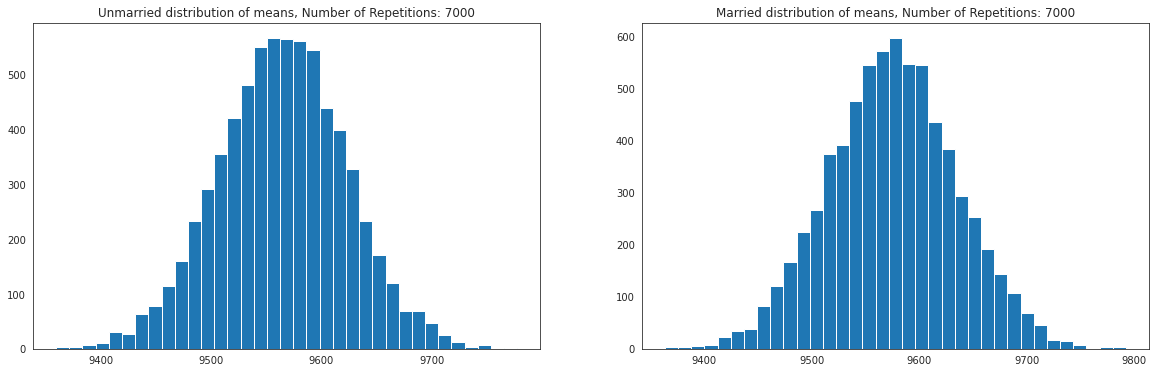

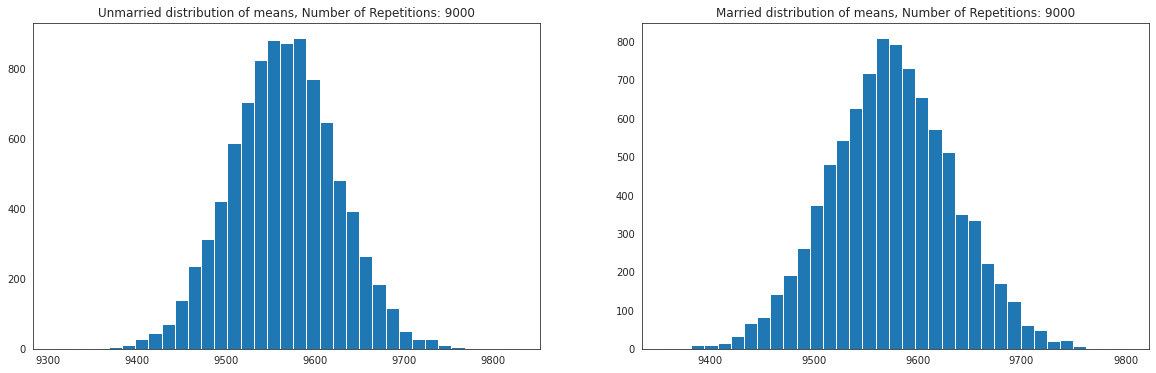

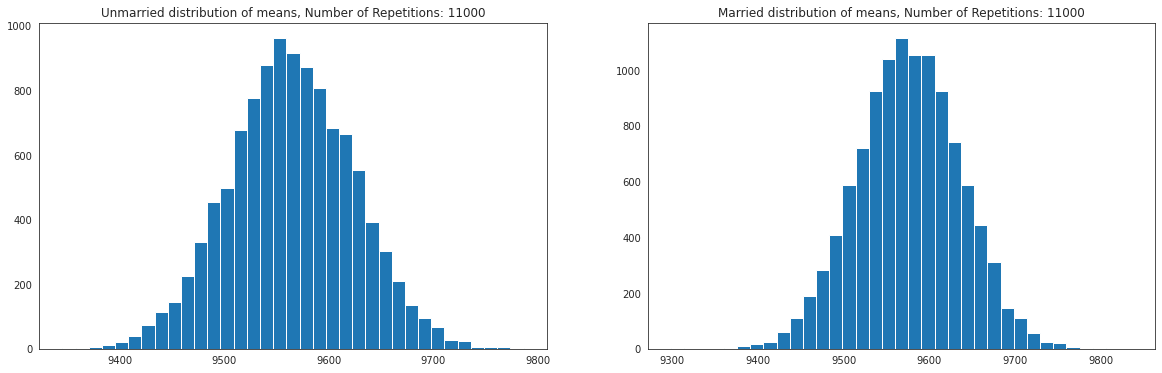

In [132]:
#Finding the sample(sample size=1000) for avg purchase amount for Unmarrieds and Marrieds
Marital_Statuses = [0,1] 
sample_size_range = 1000
num_repitions_range= np.arange(1000,11001,2000) 
for num_repitions in num_repitions_range:
    avg_Unmarried_means = []
    avg_Married_means = []
    for i in range(num_repitions):
        avg_Unmarried_mean = avg_amt_Unmarried.sample(sample_size, replace=True)['Purchase'].mean()
        avg_Married_mean = avg_amt_Married.sample(sample_size, replace=True)['Purchase'].mean()
        avg_Unmarried_means.append(avg_Unmarried_mean)
        avg_Married_means.append(avg_Married_mean)
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    axis[0].hist(avg_Unmarried_means, bins=35)
    axis[1].hist(avg_Married_means, bins=35)
    axis[0].set_title("Unmarried distribution of means, Number of Repetitions: {}".format(num_repitions))
    axis[1].set_title("Married distribution of means, Number of Repetitions: {}".format(num_repitions))
    plt.show()

Text(0, 0.5, 'Sample Mean for Unmarried customers')

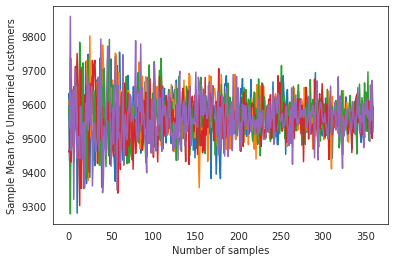

In [92]:
sample_mean_Unmarried_trend = []
for person in range(5):
    for num_samples in range(200,2000,5):
        sample_Unmarried = avg_amt_Unmarried.sample(num_samples,replace = True)
        sample_mean_Unmarried = np.mean(sample_Unmarried["Purchase"])
        sample_mean_Unmarried_trend.append(sample_mean_Unmarried)
    plt.plot(sample_mean_Unmarried_trend)
    sample_mean_Unmarried_trend = []
plt.xlabel("Number of samples")
plt.ylabel("Sample Mean for Unmarried customers")

Text(0, 0.5, 'Sample Mean for Married customers')

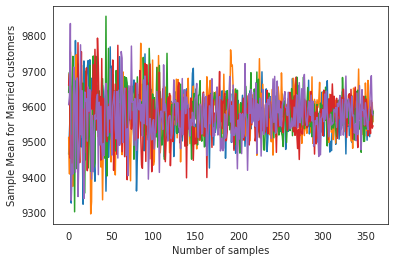

In [93]:
sample_mean_Married_trend = []
for person in range(5):
    for num_samples in range(200,2000,5):
        sample_Married = avg_amt_Married.sample(num_samples,replace = True)
        sample_mean_Married = np.mean(sample_Married["Purchase"])
        sample_mean_Married_trend.append(sample_mean_Married)
    plt.plot(sample_mean_Married_trend)
    sample_mean_Married_trend = []
plt.xlabel("Number of samples")
plt.ylabel("Sample Mean for Married customers")

### Considering Total Purchase Value

In [94]:
#Number of unique male and female customers
tot_amt_Marital_Status_walmart = walmart.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
tot_amt_Marital_Status_walmart = tot_amt_Marital_Status_walmart.reset_index()
tot_amt_Marital_Status_walmart.sort_values("Purchase",ascending = False)

,User_ID,Marital_Status,Purchase
4166,1004277,0,10536909
1634,1001680,1,8699596
2831,1002909,0,7577756
1885,1001941,0,6817493
416,1000424,0,6573609
...,...,...,...
4866,1004991,1,52371
4989,1005117,0,49668
3782,1003883,1,49349
91,1000094,0,49288


Text(0.5, 1.0, 'Unmarried tot Spend')

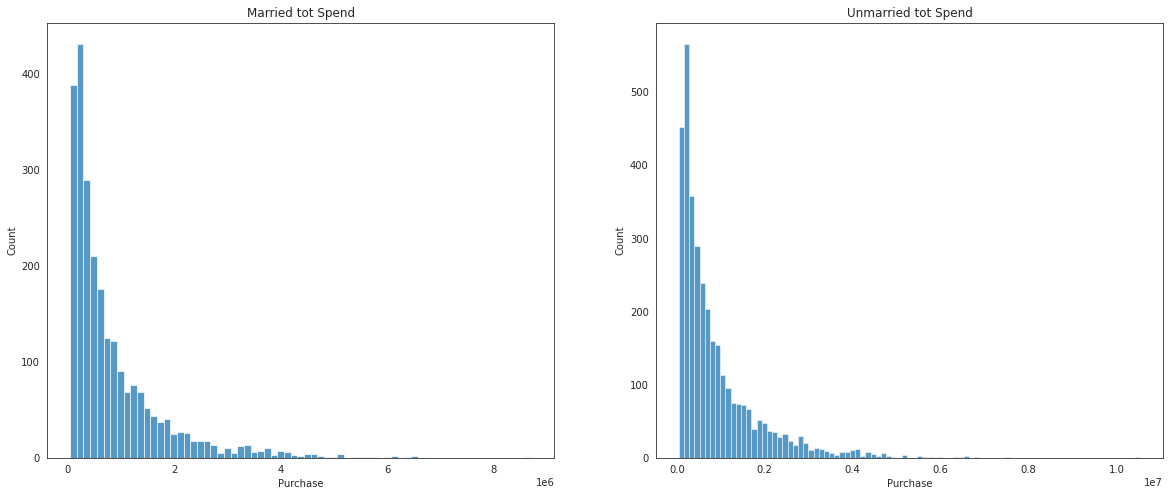

In [95]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.histplot(data=tot_amt_Marital_Status_walmart[tot_amt_Marital_Status_walmart['Marital_Status']==1]['Purchase'], ax=axs[0]).set_title("Married tot Spend")
sns.histplot(data=tot_amt_Marital_Status_walmart[tot_amt_Marital_Status_walmart['Marital_Status']==0]['Purchase'], ax=axs[1]).set_title("Unmarried tot Spend")

In [96]:
df = tot_amt_Marital_Status_walmart.groupby(["Marital_Status"])[["Purchase"]].mean()
df["Percentage"] = (df["Purchase"]/df["Purchase"].sum())*100
df

,Purchase,Percentage
Marital_Status,,
0,880575.781972,51.074443
1,843526.796686,48.925557


In [97]:
df = tot_amt_Marital_Status_walmart.groupby(["Marital_Status"])[["Purchase"]].sum()
df["Percentage"] = (df["Purchase"]/df["Purchase"].sum())*100
df

,Purchase,Percentage
Marital_Status,,
0,3008927447,59.047057
1,2086885295,40.952943


In [98]:
tot_amt_Unmarried = tot_amt_Marital_Status_walmart[tot_amt_Marital_Status_walmart["Marital_Status"]==0]
tot_amt_Married = tot_amt_Marital_Status_walmart[tot_amt_Marital_Status_walmart["Marital_Status"]==1]

In [133]:
#Finding the sample(sample size=1000) for tot purchase amount for Unmarrieds and Marrieds 
Marital_Statuses = [0,1]
sample_size = 1000
num_repitions = 1000
tot_Unmarried_means = []
tot_Married_means = []
for i in range(num_repitions):
    tot_Unmarried_mean = tot_amt_Unmarried.sample(sample_size, replace=True)['Purchase'].mean()
    tot_Married_mean = tot_amt_Married.sample(sample_size, replace=True)['Purchase'].mean()
    tot_Unmarried_means.append(tot_Unmarried_mean)
    tot_Married_means.append(tot_Married_mean)

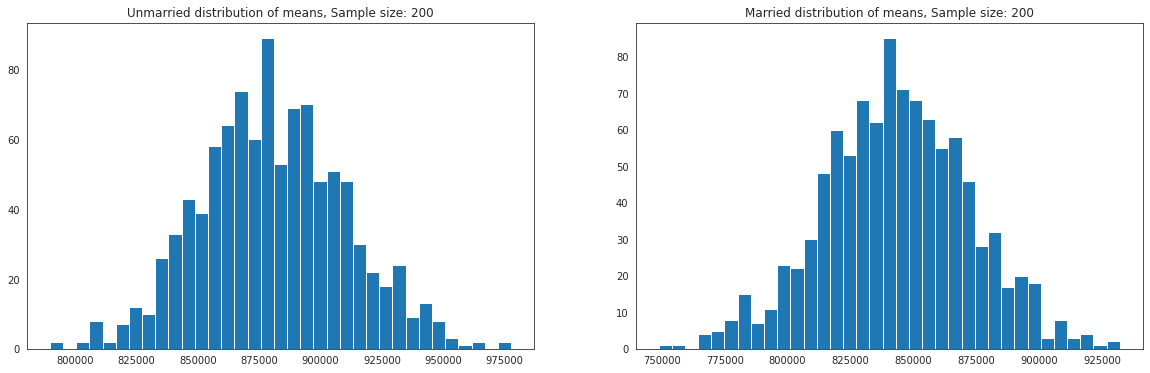

In [134]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(tot_Unmarried_means, bins=35)
axis[1].hist(tot_Married_means, bins=35)
axis[0].set_title("Unmarried distribution of means, Sample size: 200")
axis[1].set_title("Married distribution of means, Sample size: 200")
plt.show()

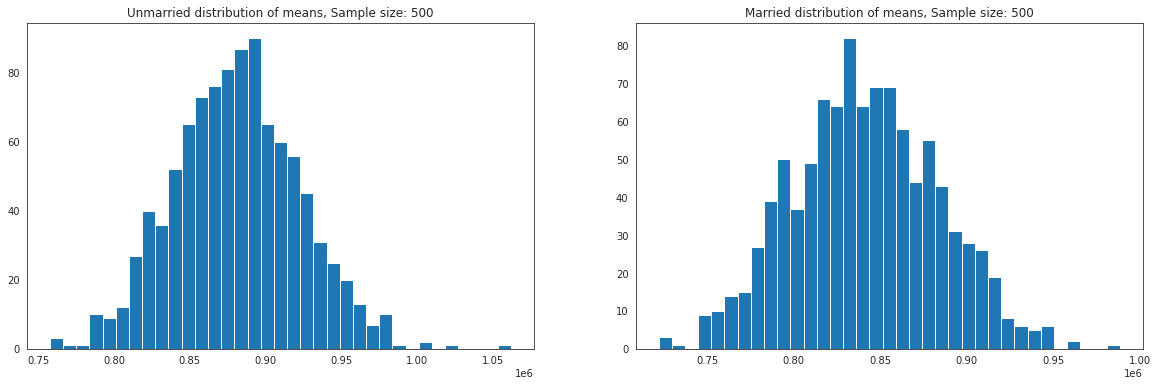

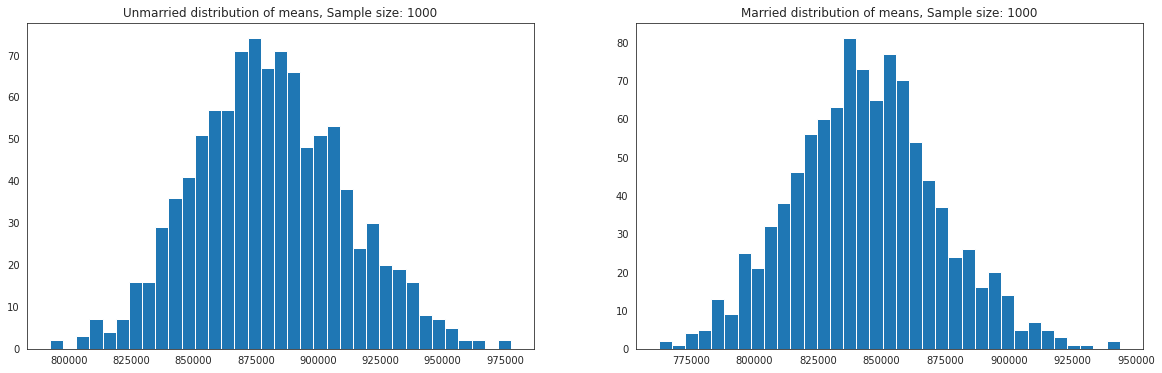

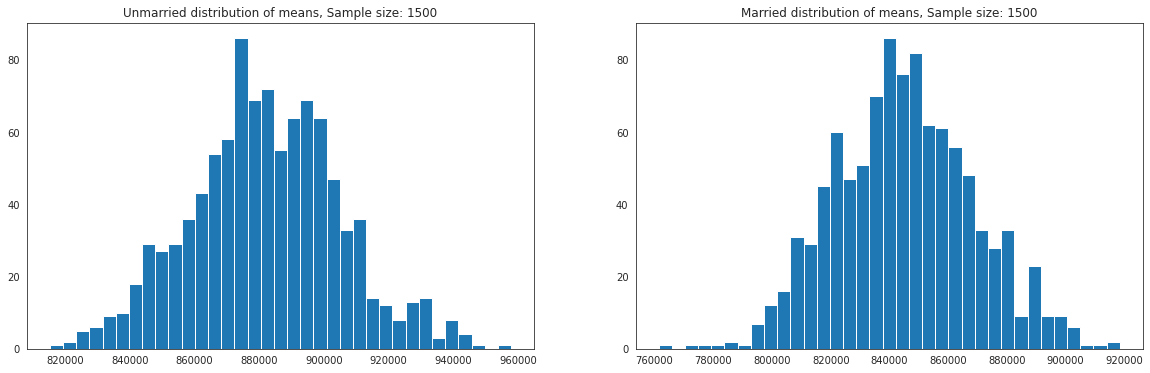

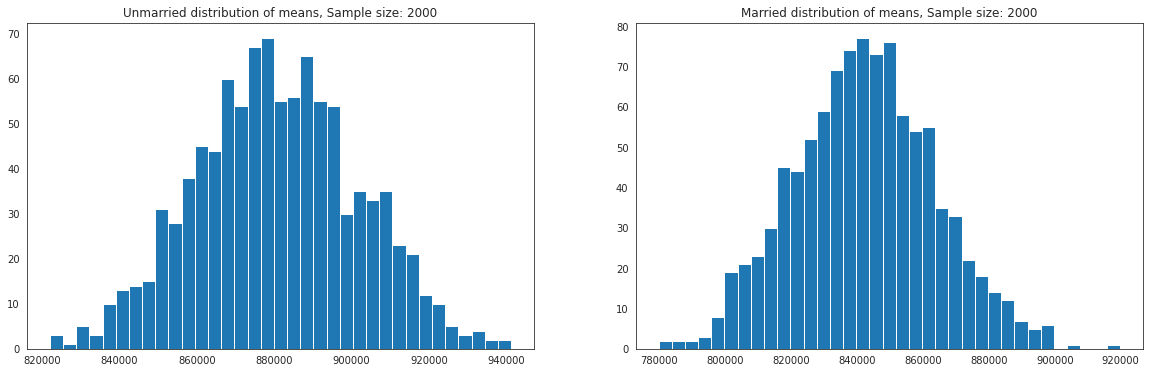

In [101]:
#Finding the sample(sample size=1000) for tot purchase amount for Unmarrieds and Marrieds 
Marital_Statuses = [0,1]
sample_size_range = np.arange(500,2100,500) 
num_repitions = 1000
for sample_size in sample_size_range:
    tot_Unmarried_means = []
    tot_Married_means = []
    for i in range(num_repitions):
        tot_Unmarried_mean = tot_amt_Unmarried.sample(sample_size, replace=True)['Purchase'].mean()
        tot_Married_mean = tot_amt_Married.sample(sample_size, replace=True)['Purchase'].mean()
        tot_Unmarried_means.append(tot_Unmarried_mean)
        tot_Married_means.append(tot_Married_mean)
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    axis[0].hist(tot_Unmarried_means, bins=35)
    axis[1].hist(tot_Married_means, bins=35)
    axis[0].set_title("Unmarried distribution of means, Sample size: {}".format(sample_size))
    axis[1].set_title("Married distribution of means, Sample size: {}".format(sample_size))
    plt.show()

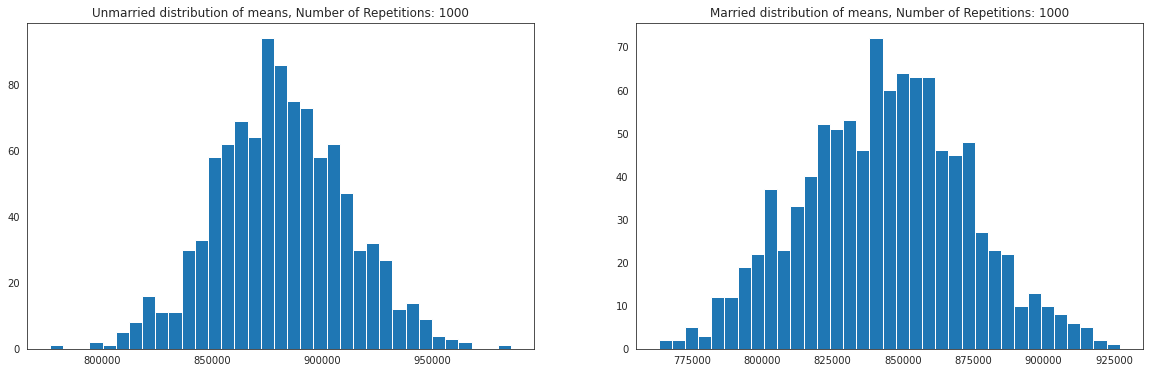

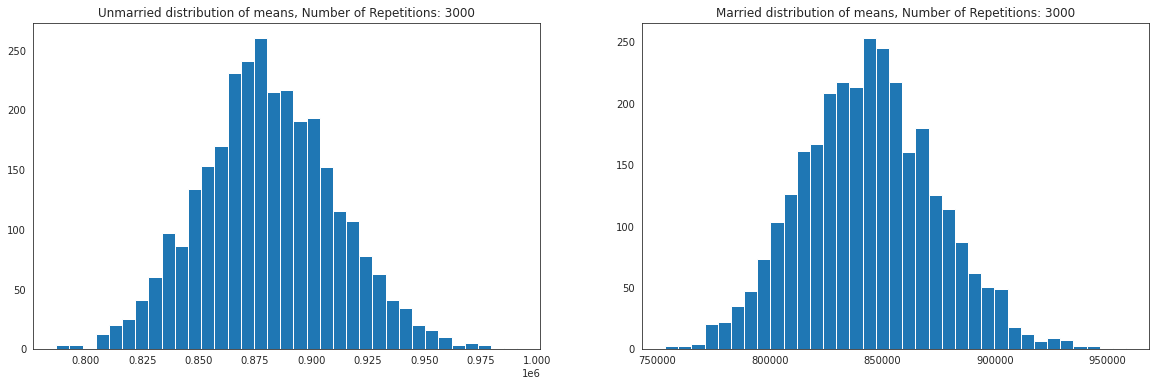

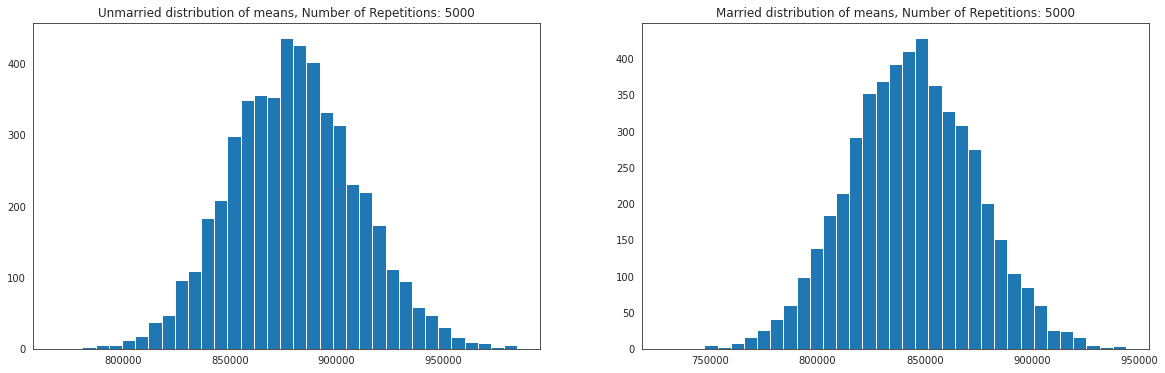

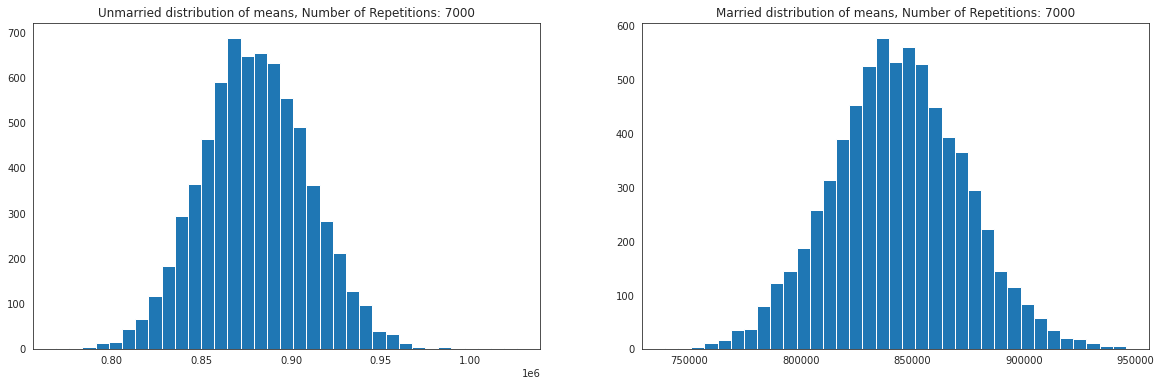

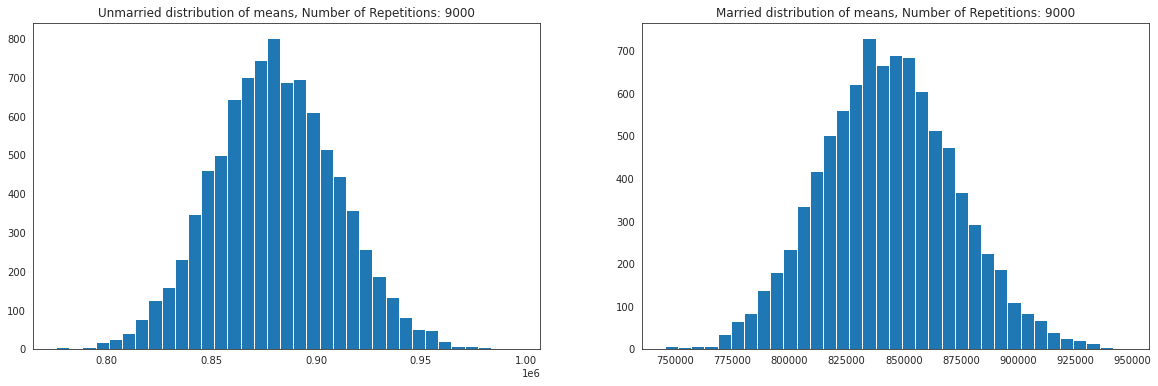

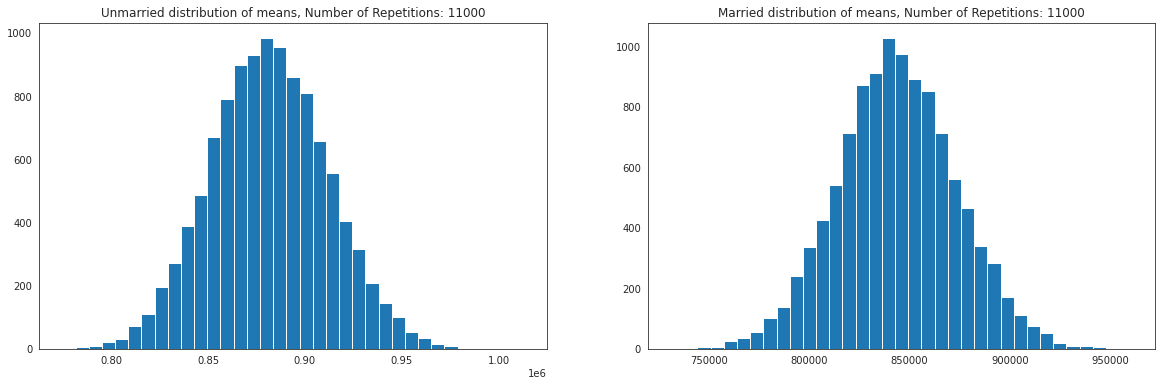

In [135]:
#Finding the sample(sample size=1000) for tot purchase amount for Unmarrieds and Marrieds 
Marital_Statuses = [0,1]
sample_size_range = 1000
num_repitions_range= np.arange(1000,11001,2000) 
for num_repitions in num_repitions_range:
    tot_Unmarried_means = []
    tot_Married_means = []
    for i in range(num_repitions):
        tot_Unmarried_mean = tot_amt_Unmarried.sample(sample_size, replace=True)['Purchase'].mean()
        tot_Married_mean = tot_amt_Married.sample(sample_size, replace=True)['Purchase'].mean()
        tot_Unmarried_means.append(tot_Unmarried_mean)
        tot_Married_means.append(tot_Married_mean)
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    axis[0].hist(tot_Unmarried_means, bins=35)
    axis[1].hist(tot_Married_means, bins=35)
    axis[0].set_title("Unmarried distribution of means, Number of Repetitions: {}".format(num_repitions))
    axis[1].set_title("Married distribution of means, Number of Repetitions: {}".format(num_repitions))
    plt.show()

Text(0, 0.5, 'Sample Mean for Unmarried customers')

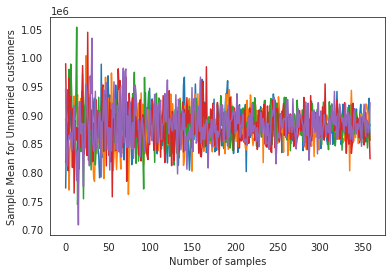

In [103]:
sample_mean_Unmarried_trend = []
for person in range(5):
    for num_samples in range(200,2000,5):
        sample_Unmarried = tot_amt_Unmarried.sample(num_samples,replace = True)
        sample_mean_Unmarried = np.mean(sample_Unmarried["Purchase"])
        sample_mean_Unmarried_trend.append(sample_mean_Unmarried)
    plt.plot(sample_mean_Unmarried_trend)
    sample_mean_Unmarried_trend = []
plt.xlabel("Number of samples")
plt.ylabel("Sample Mean for Unmarried customers")

Text(0, 0.5, 'Sample Mean for Married customers')

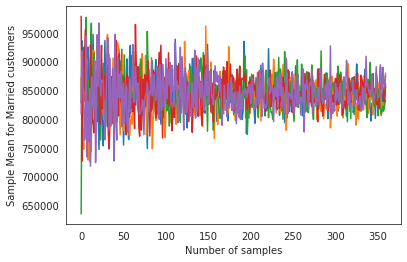

In [104]:
sample_mean_Married_trend = []
for person in range(5):
    for num_samples in range(200,2000,5):
        sample_Married = tot_amt_Married.sample(num_samples,replace = True)
        sample_mean_Married = np.mean(sample_Married["Purchase"])
        sample_mean_Married_trend.append(sample_mean_Married)
    plt.plot(sample_mean_Married_trend)
    sample_mean_Married_trend = []
plt.xlabel("Number of samples")
plt.ylabel("Sample Mean for Married customers")

##**Calculating 90%, 95% and 99% confidence intervals Marital Status Vs Purchase for various sample sizes and number of repetitions:**

###Considering Average Purchase value

In [105]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=(norm.ppf(0.95)-norm.ppf(0.05))/2#90% Confidence Interval
z95=(norm.ppf(0.975)-norm.ppf(0.025))/2 #95% Confidence Interval
z99=(norm.ppf(0.995)-norm.ppf(0.005))/2 #99% Confidence Interval

L = [z90,z95,z99]
P = [90,95,99]
k = 0
for i in L:
    print(f"For {P[k]}% confidence interval",end="\n\n")
    k += 1

    print("Population avg spend amount for Unmarried: {:.2f}".format(avg_amt_Unmarried['Purchase'].mean()))
    print("Population avg spend amount for Married: {:.2f}\n".format(avg_amt_Married['Purchase'].mean()))

    print("Sample avg spend amount for Unmarried: {:.2f}".format(np.mean(avg_Unmarried_means)))
    print("Sample avg spend amount for Married: {:.2f}\n".format(np.mean(avg_Married_means)))

    print("Sample std for Unmarried: {:.2f}".format(pd.Series(avg_Unmarried_means).std()))
    print("Sample std for Married: {:.2f}\n".format(pd.Series(avg_Married_means).std()))

    print("Sample std error for Unmarried: {:.2f}".format(pd.Series(avg_Unmarried_means).std()/np.sqrt(1000))) 
    print("Sample std error for Married: {:.2f}\n".format(pd.Series(avg_Married_means).std()/np.sqrt(1000)))

    sample_mean_Unmarried=np.mean(avg_Unmarried_means)
    sample_mean_Married=np.mean(avg_Married_means)

    sample_std_Unmarried=pd.Series(avg_Unmarried_means).std()
    sample_std_Married=pd.Series(avg_Married_means).std()

    sample_std_error_Unmarried=sample_std_Unmarried/np.sqrt(1000)
    sample_std_error_Married=sample_std_Married/np.sqrt(1000)

    Upper_Limit_Unmarried=i*sample_std_error_Unmarried + sample_mean_Unmarried
    Lower_Limit_Unmarried=sample_mean_Unmarried - i*sample_std_error_Unmarried

    Upper_Limit_Married=i*sample_std_error_Married + sample_mean_Married
    Lower_Limit_Married=sample_mean_Married - i*sample_std_error_Married

    print("Unmarried_CI: ",[Lower_Limit_Unmarried,Upper_Limit_Unmarried])
    print("Married_CI: ",[Lower_Limit_Married,Upper_Limit_Married],end="\n"*4)

For 90% confidence interval

Population avg spend amount for Unmarried: 9564.41
Population avg spend amount for Married: 9574.96

Sample avg spend amount for Unmarried: 9564.01
Sample avg spend amount for Married: 9574.87

Sample std for Unmarried: 42.10
Sample std for Married: 42.87

Sample std error for Unmarried: 1.33
Sample std error for Married: 1.36

Unmarried_CI:  [9561.824451457214, 9566.203667684382]
Married_CI:  [9572.640874361774, 9577.100797339675]



For 95% confidence interval

Population avg spend amount for Unmarried: 9564.41
Population avg spend amount for Married: 9574.96

Sample avg spend amount for Unmarried: 9564.01
Sample avg spend amount for Married: 9574.87

Sample std for Unmarried: 42.10
Sample std for Married: 42.87

Sample std error for Unmarried: 1.33
Sample std error for Married: 1.36

Unmarried_CI:  [9561.404980578867, 9566.623138562729]
Married_CI:  [9572.213672846285, 9577.527998855165]



For 99% confidence interval

Population avg spend amount for Unm

In [136]:
#Finding the sample(sample size=varies from 500 to 2000) for avg purchase amount for Unmarrieds and Marrieds 
Marital_Statuses = [0,1]
sample_size_range = np.arange(500,2100,500)
num_repitions = 1000
for sample_size in sample_size_range:
    print("FOR SAMPLE SIZE = {}".format(sample_size),end="\n"*2)
    avg_Unmarried_means = []
    avg_Married_means = []
    for i in range(num_repitions):
        avg_Unmarried_mean = avg_amt_Unmarried.sample(sample_size, replace=True)['Purchase'].mean()
        avg_Married_mean = avg_amt_Married.sample(sample_size, replace=True)['Purchase'].mean()
        avg_Unmarried_means.append(avg_Unmarried_mean)
        avg_Married_means.append(avg_Married_mean)

    #Taking the values for z at 90%, 95% and 99% confidence interval as:
    z90=(norm.ppf(0.95)-norm.ppf(0.05))/2#90% Confidence Interval
    z95=(norm.ppf(0.975)-norm.ppf(0.025))/2 #95% Confidence Interval
    z99=(norm.ppf(0.995)-norm.ppf(0.005))/2 #99% Confidence Interval

    L = [z90,z95,z99]
    P = [90,95,99]
    k = 0
    for i in L:
        print(f"For {P[k]}% confidence interval",end="\n\n")
        k += 1

        print("Population avg spend amount for Unmarried: {:.2f}".format(avg_amt_Unmarried['Purchase'].mean()))
        print("Population avg spend amount for Married: {:.2f}\n".format(avg_amt_Married['Purchase'].mean()))

        print("Sample avg spend amount for Unmarried: {:.2f}".format(np.mean(avg_Unmarried_means)))
        print("Sample avg spend amount for Married: {:.2f}\n".format(np.mean(avg_Married_means)))

        print("Sample std for Unmarried: {:.2f}".format(pd.Series(avg_Unmarried_means).std()))
        print("Sample std for Married: {:.2f}\n".format(pd.Series(avg_Married_means).std()))

        print("Sample std error for Unmarried: {:.2f}".format(pd.Series(avg_Unmarried_means).std()/np.sqrt(sample_size))) 
        print("Sample std error for Married: {:.2f}\n".format(pd.Series(avg_Married_means).std()/np.sqrt(sample_size)))

        sample_mean_Unmarried=np.mean(avg_Unmarried_means)
        sample_mean_Married=np.mean(avg_Married_means)

        sample_std_Unmarried=pd.Series(avg_Unmarried_means).std()
        sample_std_Married=pd.Series(avg_Married_means).std()

        sample_std_error_Unmarried=sample_std_Unmarried/np.sqrt(sample_size)
        sample_std_error_Married=sample_std_Married/np.sqrt(sample_size)

        Upper_Limit_Unmarried=i*sample_std_error_Unmarried + sample_mean_Unmarried
        Lower_Limit_Unmarried=sample_mean_Unmarried - i*sample_std_error_Unmarried

        Upper_Limit_Married=i*sample_std_error_Married + sample_mean_Married
        Lower_Limit_Married=sample_mean_Married - i*sample_std_error_Married

        print("Unmarried_CI: ",[Lower_Limit_Unmarried,Upper_Limit_Unmarried])
        print("Married_CI: ",[Lower_Limit_Married,Upper_Limit_Married],end="\n"*4)

FOR SAMPLE SIZE = 500

For 90% confidence interval

Population avg spend amount for Unmarried: 9564.41
Population avg spend amount for Married: 9574.96

Sample avg spend amount for Unmarried: 9562.06
Sample avg spend amount for Married: 9574.88

Sample std for Unmarried: 86.32
Sample std for Married: 85.20

Sample std error for Unmarried: 3.86
Sample std error for Married: 3.81

Unmarried_CI:  [9555.711748986765, 9568.41116443106]
Married_CI:  [9568.608087319108, 9581.142063179776]



For 95% confidence interval

Population avg spend amount for Unmarried: 9564.41
Population avg spend amount for Married: 9574.96

Sample avg spend amount for Unmarried: 9562.06
Sample avg spend amount for Married: 9574.88

Sample std for Unmarried: 86.32
Sample std for Married: 85.20

Sample std error for Unmarried: 3.86
Sample std error for Married: 3.81

Unmarried_CI:  [9554.495313288096, 9569.627600129728]
Married_CI:  [9567.407498540038, 9582.342651958845]



For 99% confidence interval

Population av

###Considering Total Purchase Value

In [107]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=(norm.ppf(0.95)-norm.ppf(0.05))/2#90% Confidence Interval
z95=(norm.ppf(0.975)-norm.ppf(0.025))/2 #95% Confidence Interval
z99=(norm.ppf(0.995)-norm.ppf(0.005))/2 #99% Confidence Interval

L = [z90,z95,z99]
P = [90,95,99]
k = 0
for i in L:
    print(f"For {P[k]}% confidence interval",end="\n\n")
    k += 1

    print("Population tot spend amount for Unmarried: {:.2f}".format(tot_amt_Unmarried['Purchase'].mean()))
    print("Population tot spend amount for Married: {:.2f}\n".format(tot_amt_Married['Purchase'].mean()))

    print("Sample tot spend amount for Unmarried: {:.2f}".format(np.mean(tot_Unmarried_means)))
    print("Sample tot spend amount for Married: {:.2f}\n".format(np.mean(tot_Married_means)))

    print("Sample std for Unmarried: {:.2f}".format(pd.Series(tot_Unmarried_means).std()))
    print("Sample std for Married: {:.2f}\n".format(pd.Series(tot_Married_means).std()))

    print("Sample std error for Unmarried: {:.2f}".format(pd.Series(tot_Unmarried_means).std()/np.sqrt(1000))) 
    print("Sample std error for Married: {:.2f}\n".format(pd.Series(tot_Married_means).std()/np.sqrt(1000)))

    sample_mean_Unmarried=np.mean(tot_Unmarried_means)
    sample_mean_Married=np.mean(tot_Married_means)

    sample_std_Unmarried=pd.Series(tot_Unmarried_means).std()
    sample_std_Married=pd.Series(tot_Married_means).std()

    sample_std_error_Unmarried=sample_std_Unmarried/np.sqrt(1000)
    sample_std_error_Married=sample_std_Married/np.sqrt(1000)

    Upper_Limit_Unmarried=i*sample_std_error_Unmarried + sample_mean_Unmarried
    Lower_Limit_Unmarried=sample_mean_Unmarried - i*sample_std_error_Unmarried

    Upper_Limit_Married=i*sample_std_error_Married + sample_mean_Married
    Lower_Limit_Married=sample_mean_Married - i*sample_std_error_Married

    print("Unmarried_CI: ",[Lower_Limit_Unmarried,Upper_Limit_Unmarried])
    print("Married_CI: ",[Lower_Limit_Married,Upper_Limit_Married],end="\n"*4)

For 90% confidence interval

Population tot spend amount for Unmarried: 880575.78
Population tot spend amount for Married: 843526.80

Sample tot spend amount for Unmarried: 880567.63
Sample tot spend amount for Married: 843576.17

Sample std for Unmarried: 21244.35
Sample std for Married: 21364.19

Sample std error for Unmarried: 671.81
Sample std error for Married: 675.60

Unmarried_CI:  [879462.6040186816, 881672.6466136823]
Married_CI:  [842464.9152250631, 844687.4252572096]



For 95% confidence interval

Population tot spend amount for Unmarried: 880575.78
Population tot spend amount for Married: 843526.80

Sample tot spend amount for Unmarried: 880567.63
Sample tot spend amount for Married: 843576.17

Sample std for Unmarried: 21244.35
Sample std for Married: 21364.19

Sample std error for Unmarried: 671.81
Sample std error for Married: 675.60

Unmarried_CI:  [879250.9112269991, 881884.3394053647]
Married_CI:  [842252.0282181286, 844900.3122641441]



For 99% confidence interval


In [137]:
#Finding the sample(sample size=varies from 200 to 2000) for tot purchase amount for Unmarrieds and Marrieds 
sample_size_range = np.arange(500,2100,500)
num_repitions = 1000
for sample_size in sample_size_range:
    print("FOR SAMPLE SIZE = {}".format(sample_size),end="\n"*2)
    tot_Unmarried_means = []
    tot_Married_means = []
    for i in range(num_repitions):
        tot_Unmarried_mean = tot_amt_Unmarried.sample(sample_size, replace=True)['Purchase'].mean()
        tot_Married_mean = tot_amt_Married.sample(sample_size, replace=True)['Purchase'].mean()
        tot_Unmarried_means.append(tot_Unmarried_mean)
        tot_Married_means.append(tot_Married_mean)

    #Taking the values for z at 90%, 95% and 99% confidence interval as:
    z90=(norm.ppf(0.95)-norm.ppf(0.05))/2#90% Confidence Interval
    z95=(norm.ppf(0.975)-norm.ppf(0.025))/2 #95% Confidence Interval
    z99=(norm.ppf(0.995)-norm.ppf(0.005))/2 #99% Confidence Interval

    L = [z90,z95,z99]
    P = [90,95,99]
    k = 0
    for i in L:
        print(f"For {P[k]}% confidence interval",end="\n\n")
        k += 1

        print("Population tot spend amount for Unmarried: {:.2f}".format(tot_amt_Unmarried['Purchase'].mean()))
        print("Population tot spend amount for Married: {:.2f}\n".format(tot_amt_Married['Purchase'].mean()))

        print("Sample tot spend amount for Unmarried: {:.2f}".format(np.mean(tot_Unmarried_means)))
        print("Sample tot spend amount for Married: {:.2f}\n".format(np.mean(tot_Married_means)))

        print("Sample std for Unmarried: {:.2f}".format(pd.Series(tot_Unmarried_means).std()))
        print("Sample std for Married: {:.2f}\n".format(pd.Series(tot_Married_means).std()))

        print("Sample std error for Unmarried: {:.2f}".format(pd.Series(tot_Unmarried_means).std()/np.sqrt(sample_size))) 
        print("Sample std error for Married: {:.2f}\n".format(pd.Series(tot_Married_means).std()/np.sqrt(sample_size)))

        sample_mean_Unmarried=np.mean(tot_Unmarried_means)
        sample_mean_Married=np.mean(tot_Married_means)

        sample_std_Unmarried=pd.Series(tot_Unmarried_means).std()
        sample_std_Married=pd.Series(tot_Married_means).std()

        sample_std_error_Unmarried=sample_std_Unmarried/np.sqrt(sample_size)
        sample_std_error_Married=sample_std_Married/np.sqrt(sample_size)

        Upper_Limit_Unmarried=i*sample_std_error_Unmarried + sample_mean_Unmarried
        Lower_Limit_Unmarried=sample_mean_Unmarried - i*sample_std_error_Unmarried

        Upper_Limit_Married=i*sample_std_error_Married + sample_mean_Married
        Lower_Limit_Married=sample_mean_Married - i*sample_std_error_Married

        print("Unmarried_CI: ",[Lower_Limit_Unmarried,Upper_Limit_Unmarried])
        print("Married_CI: ",[Lower_Limit_Married,Upper_Limit_Married],end="\n"*4)

FOR SAMPLE SIZE = 500

For 90% confidence interval

Population tot spend amount for Unmarried: 880575.78
Population tot spend amount for Married: 843526.80

Sample tot spend amount for Unmarried: 878480.12
Sample tot spend amount for Married: 842814.59

Sample std for Unmarried: 43217.95
Sample std for Married: 43282.54

Sample std error for Unmarried: 1932.77
Sample std error for Married: 1935.65

Unmarried_CI:  [875301.0019179899, 881659.2338620103]
Married_CI:  [839630.7191889907, 845998.4543030096]



For 95% confidence interval

Population tot spend amount for Unmarried: 880575.78
Population tot spend amount for Married: 843526.80

Sample tot spend amount for Unmarried: 878480.12
Sample tot spend amount for Married: 842814.59

Sample std for Unmarried: 43217.95
Sample std for Married: 43282.54

Sample std error for Unmarried: 1932.77
Sample std error for Married: 1935.65

Unmarried_CI:  [874691.9675611685, 882268.2682188317]
Married_CI:  [839020.7745544256, 846608.3989375746]



F

##**Similarly CLT and Confidence Interval for Age Column Vs Purchase**

In [109]:
avgamt_age = walmart.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avgamt_age = avgamt_age.reset_index()

avgamt_age['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

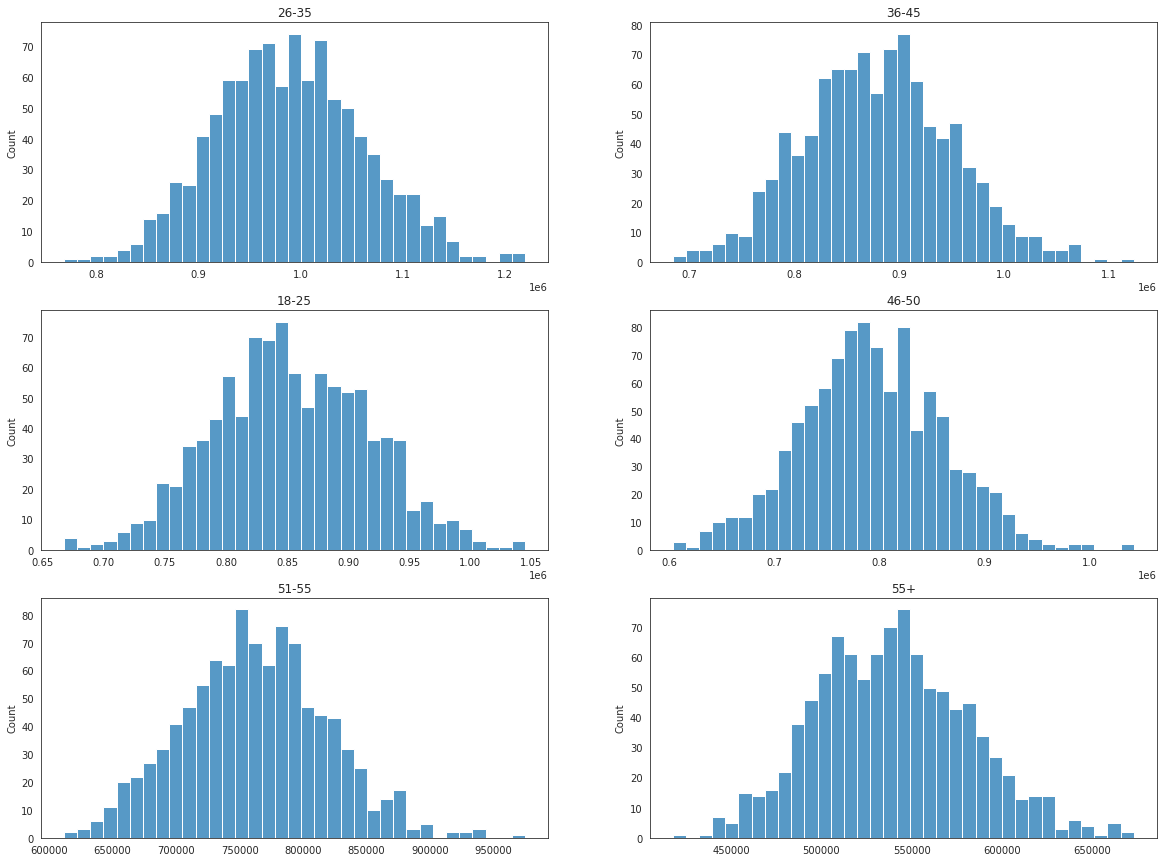

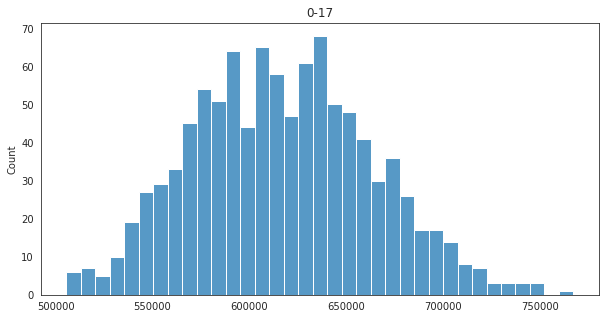

In [112]:
sample_size = 200
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    
for i in age_intervals:
    for j in range(num_repitions):
        
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)
        

        
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0]).set(title = "26-35")
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1]).set(title = "36-45")
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0]).set(title = "18-25")
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1]).set(title = "46-50")
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0]).set(title = "51-55")
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2,1]).set(title = "55+")

plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'],bins=35).set(title = "0-17")
plt.show()



####90% Confidence Interval

In [113]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_population_means={}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i]=[]
    population_mean=avgamt_age[avgamt_age['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)
    
print("All age group population mean: \n", all_population_means)
print("\n")
    
for i in age_intervals:
    for j in range(num_repitions):
        
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)
        
        
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avgamt_age[avgamt_age['Age']==val] 
    
    std_error = z90*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (952206.28, 1027112.35)
For age 36-45 confidence interval of means: (832398.89, 926932.53)
For age 18-25 confidence interval of means: (810187.65, 899538.59)
For age 46-50 confidence interval of means: (726209.00, 858888.57)
For age 51-55 confidence interval of means: (703772.36, 822629.48)
For age 55+ confidence interval of means: (487032.92, 592361.57)
For age 0-17 confidence interval of means: (542320.46, 695415.16)


####95% Confidence Interval

In [114]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avgamt_age[avgamt_age['Age']==val] 
    
    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence interval of means: (713505.63, 871591.93)
For age 51-55 confidence interval of means: (692392.43, 834009.42)
For age 55+ confidence interval of means: (476948.26, 602446.23)
For age 0-17 confidence interval of means: (527662.46, 710073.17)


####99% Confidence Interval

In [115]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avgamt_age[avgamt_age['Age']==val] 
    
    std_error = z99*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (931009.46, 1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)


#CHAPTER 7: RECOMMENDATIONS AND QUESTIONS

Recommendations:

1. Men spent more money than women, company can focus on retaining the male customers and getting more male customers.
    
2. Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.
    
3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
    
4. Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.
    
5. We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.
    
6. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.
    
7. Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.
    
8. The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business. 
    
9. The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.
    
10. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.
    
11. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.
    
12. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.

Question:

1. Are women spending more money per transaction than men? Why or Why not?
    
Ans: No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women).

2. The reason for less purchase by women could have several factors:

Ans: Males might be doing the purchase for females.Salary can be a factor in less purchase. We also need to see whether male-based products were sold more than women-based products to clearly identify difference in spending pattern. If the female based products quality/quantity needs to be improved for women purchasing.
    
3. Confidence intervals and distribution of the mean of the expenses by female and male customers.
    
Ans: At 99% Confidence Interval with sample size 1000.Average amount spend by male customers lie in the range 9,22,011.28 - 9,27,154.61.Average amount spend by female customers lie in range 7,09,678.88 - 7,13,811.31
     
4. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
    
Ans: No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.
    
5. Results when the same activity is performed for Married vs Unmarried
    
Ans: At 99% Confidence Interval with sample size 1000.Average amount spend by married customers lie in the range:  [841059.6309378392, 845078.140167503].Average amount spend by unmarried customers lie in the range:  [879093.3492016713, 884078.6782803286]
    
6. Results when the same activity is performed for Age
    
Ans: At 99% Confidence Interval with sample size 200
    
For age 26-35 confidence interval of means: (931009.46,1048309.18)<br>
For age 36-45 confidence interval of means: (805647.89, 953683.53)<br>
For age 18-25 confidence interval of means: (784903.24, 924823.00)<br>
For age 46-50 confidence interval of means: (688663.50, 896434.06)<br>
For age 51-55 confidence interval of means: (670138.33, 856263.52)<br>
For age 55+ confidence interval of means: (457227.15, 622167.34)<br>
For age 0-17 confidence interval of means: (498997.92, 738737.71)<br>

    